Uber dataset: https://www.kaggle.com/datasets/bhanupratapbiswas/uber-data-analysis/data

In [2]:
import numpy as np #create arrays
import pandas as pd #for data analysis
import seaborn as sns #for visualisation 
import matplotlib.pyplot as plt #for visualisation
# %matplotlib inline

import warnings #suppress warnings
warnings.filterwarnings('ignore')

#### Data Structure

In [3]:
#load Uber dataset
df = pd.read_csv('UberDataset.csv')
df.head() #show top 5 rows of data

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
# Check information about dataset structure and contents
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


(1156, 7)

There are four categorical features and one continuous numerical feature called 'miles'. There is also some date-time data that will need to be converted to datetime format before being used.

There are 1156 Uber trips and 7 features.

### Data Exploration

##### Numerical data

In [5]:
# Summary of numerical attributes of miles
df.describe() 

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


The average miles travelled for an Uber trip was 21.12 miles, SD = 359.3 miles. The SD is much higher than the mean which could suggest some outliers. 

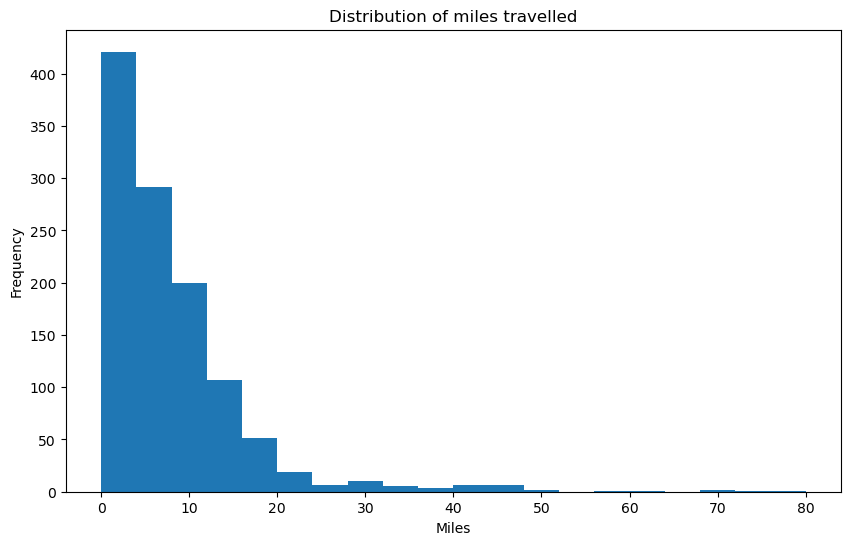

In [6]:
plt.figure(figsize=(10, 6))
plt.hist(df['MILES'], bins=20, range=[0,80])
plt.title('Distribution of miles travelled')
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.show()

Histogram shows right skewed distribution of data and indicates that most trips are short with fewer longer distance trips.

#### Categorical data

In [7]:
#Check categories and how many are in each type
category = df['CATEGORY'].value_counts()
print (category)

CATEGORY
Business    1078
Personal      77
Name: count, dtype: int64


The data is unbalanced between business and personal use. Much higher number of trips are for business purposes. 

In [8]:
#Check categories and how many trips were made in each type of trip
purpose = df['PURPOSE'].value_counts()
print (purpose)

PURPOSE
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: count, dtype: int64


There is only 1 trip made for Charity and Commute, these may need removing. Moving and Airport/travel also have low number of trips.

In [9]:
#Check categories and how many trips are made from which locations
start= df['START'].value_counts()
print (start)

START
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
                   ... 
Florence              1
Ridgeland             1
Daytona Beach         1
Sky Lake              1
Gampaha               1
Name: count, Length: 177, dtype: int64


In [10]:
#Check categories and how many trips are going to which locations
stop= df['STOP'].value_counts()
print (stop)

STOP
Cary                 203
Unknown Location     149
Morrisville           84
Whitebridge           65
Islamabad             58
                    ... 
Daytona Beach          1
Sand Lake Commons      1
Sky Lake               1
Vista East             1
Ilukwatta              1
Name: count, Length: 188, dtype: int64


Main pick up and drop off are within Cary or to unknown locations.

#### Data summary

In [11]:
# Calculate statistics on the number of miles travelled for each type of trip
descriptive_stats_purpose = df.groupby('PURPOSE')['MILES'].describe()
print("Descriptive statistics on number of miles travelled and purpose of travel:")
print(descriptive_stats_purpose)

descriptive_stats_category = df.groupby('CATEGORY')['MILES'].describe()
print("\nDescriptive statistics on number of miles travelled and category of travel:")
print(descriptive_stats_category)

Descriptive statistics on number of miles travelled and purpose of travel:
                 count        mean        std    min      25%     50%  \
PURPOSE                                                                 
Airport/Travel     3.0    5.500000   1.852026    4.1    4.450    4.80   
Between Offices   18.0   10.944444   8.458913    1.9    5.200   11.60   
Charity ($)        1.0   15.100000        NaN   15.1   15.100   15.10   
Commute            1.0  180.200000        NaN  180.2  180.200  180.20   
Customer Visit   101.0   20.688119  40.632891    0.8    5.200    7.90   
Errand/Supplies  128.0    3.968750   3.464619    0.5    1.800    3.10   
Meal/Entertain   160.0    5.698125   5.019690    0.6    2.775    4.25   
Meeting          187.0   15.247594  25.093394    0.7    7.900   10.00   
Moving             4.0    4.550000   1.181807    3.3    3.900    4.40   
Temporary Site    50.0   10.474000   7.757440    1.8    6.100    8.00   

                     75%    max  
PURPOSE       

#### Data Visualisation

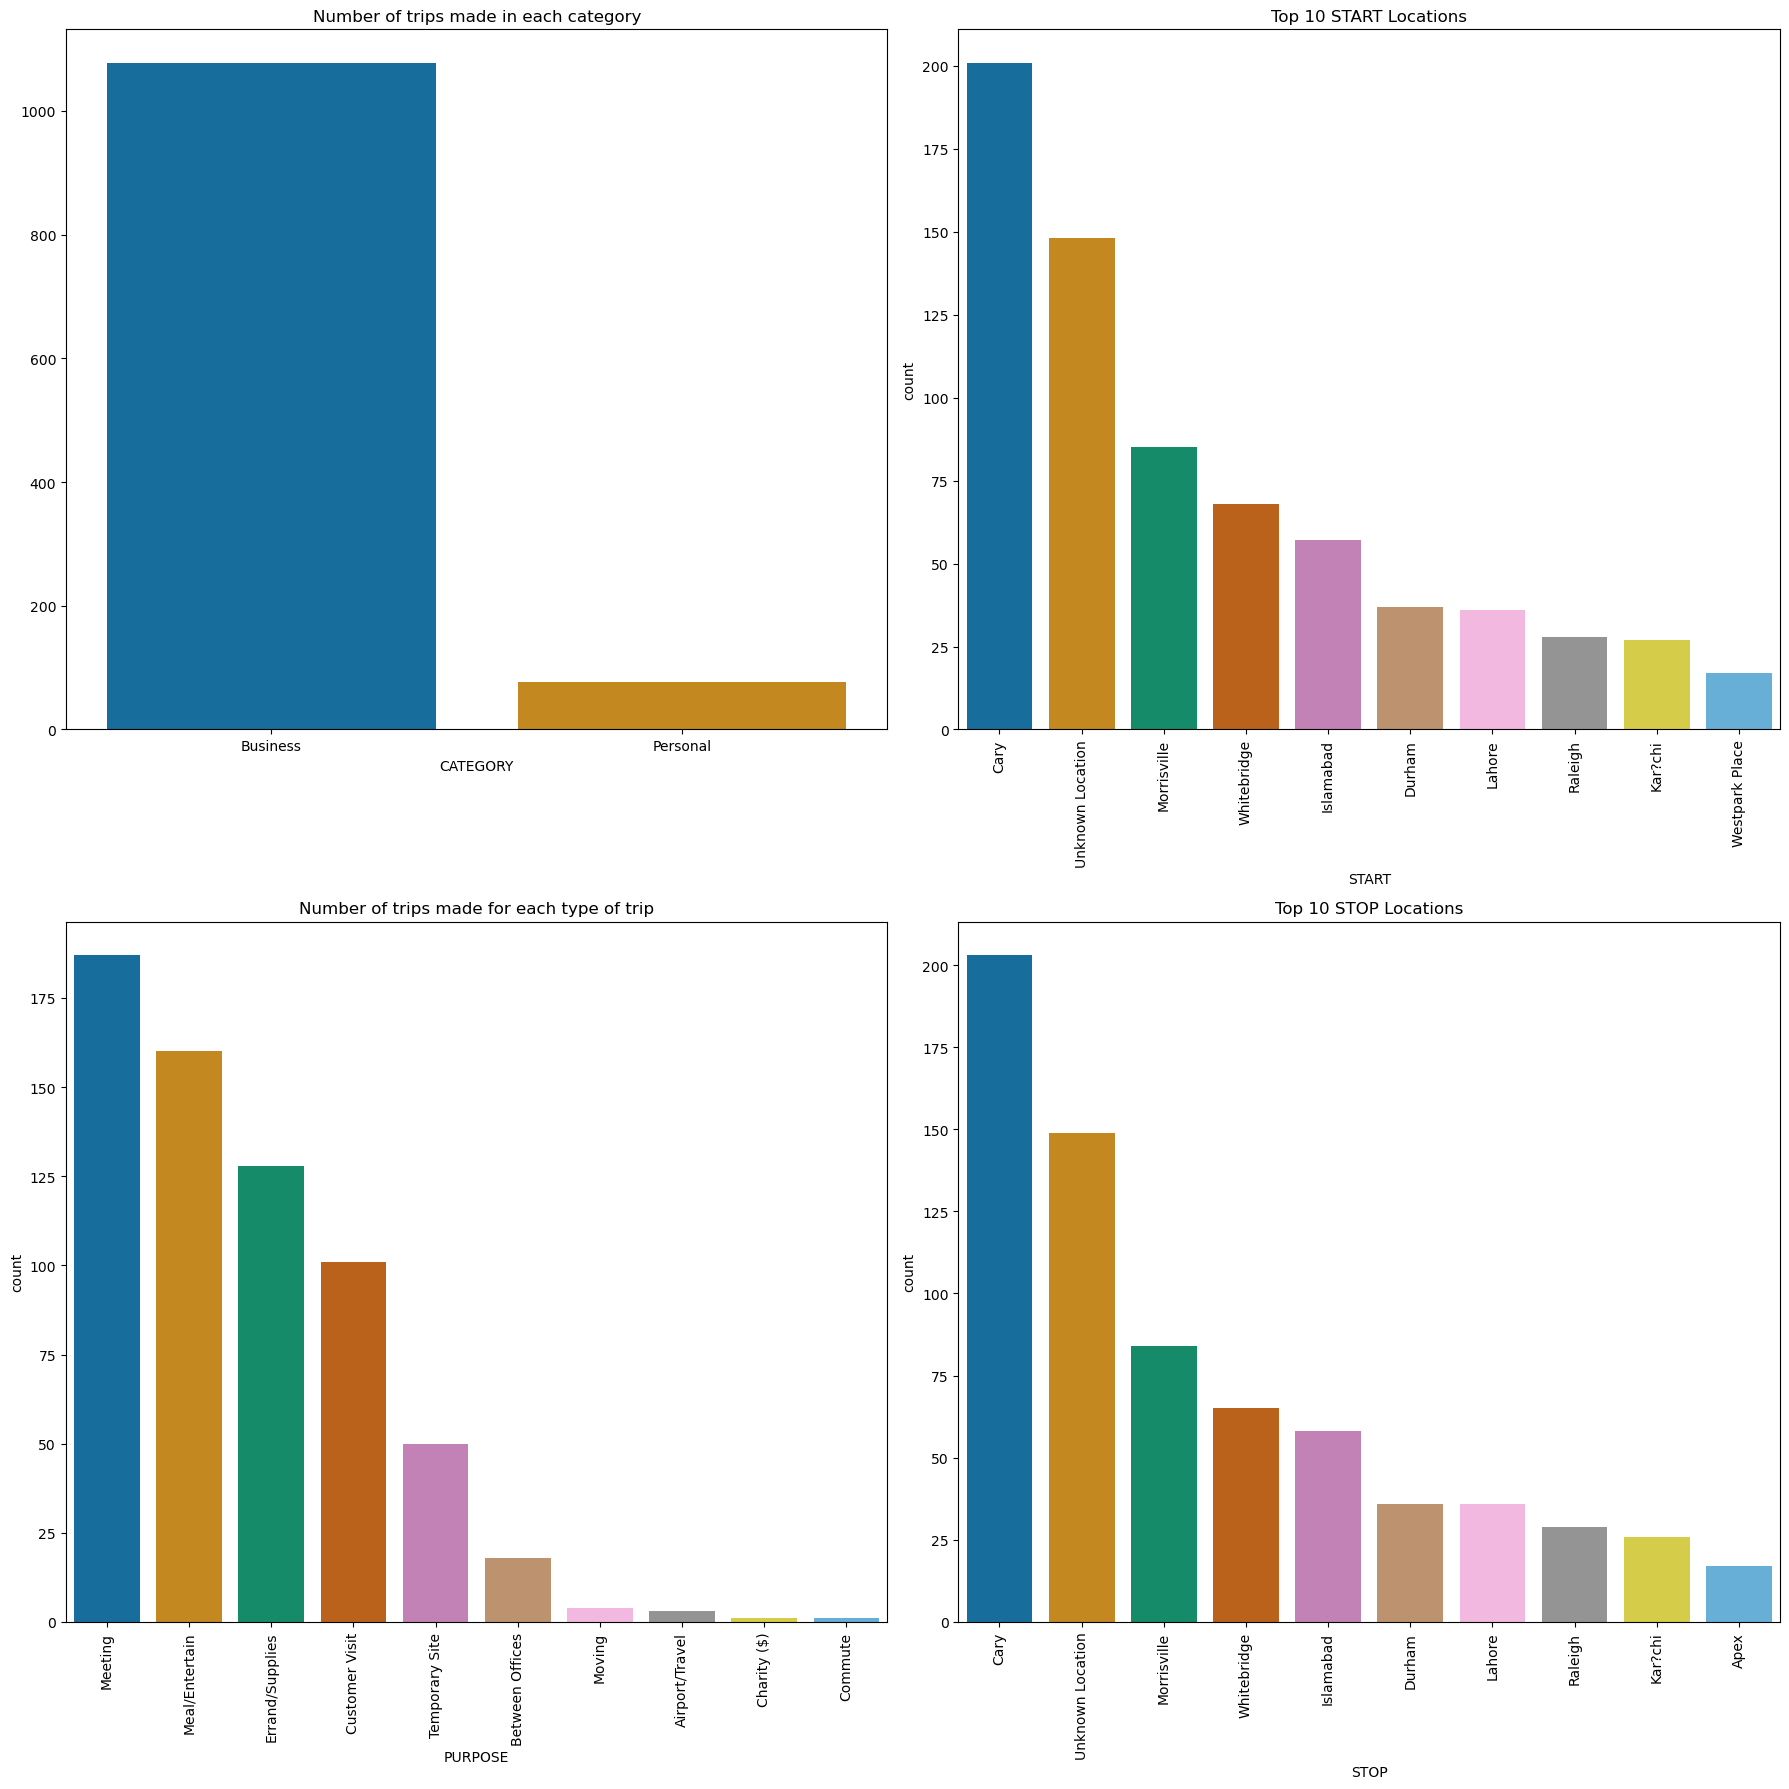

In [12]:
# Convert 'CATEGORY' column to categorical data type
df['CATEGORY'] = df['CATEGORY'].astype('category')

#Create bar charts using number of trips
fig, axes = plt.subplots(2, 2, figsize=(18, 18))#create plots

# Number of trips made in each category
sns.barplot(x=category.index, y=category.values, ax=axes[0, 0], palette='colorblind')
axes[0, 0].set_title('Number of trips made in each category')

# Number of trips made for each type of trip 
sns.countplot(x = 'PURPOSE', data = df, order = purpose.index, ax=axes[1, 0], palette='colorblind')

axes[1, 0].set_title('Number of trips made for each type of trip')
axes[1, 0].tick_params(axis='x', rotation=90)

# Plotting the top 10 start locations
sns.countplot(data=df, x='START', order=df['START'].value_counts().nlargest(10).index, ax=axes[0, 1], palette='colorblind')
axes[0, 1].set_title('Top 10 START Locations')
axes[0, 1].tick_params(axis='x', rotation=90)

# Plotting Top 10 locations for STOP
sns.countplot(data=df, x='STOP', order=df['STOP'].value_counts().nlargest(10).index, ax=axes[1, 1], palette='colorblind')
axes[1, 1].set_title('Top 10 STOP Locations')
axes[1, 1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

93.25% of trips were made for business and only 6.66% were for personal use. 
Uber was mainly used for meetings, meals/entertaining,  errand/supplies and customer visits. 

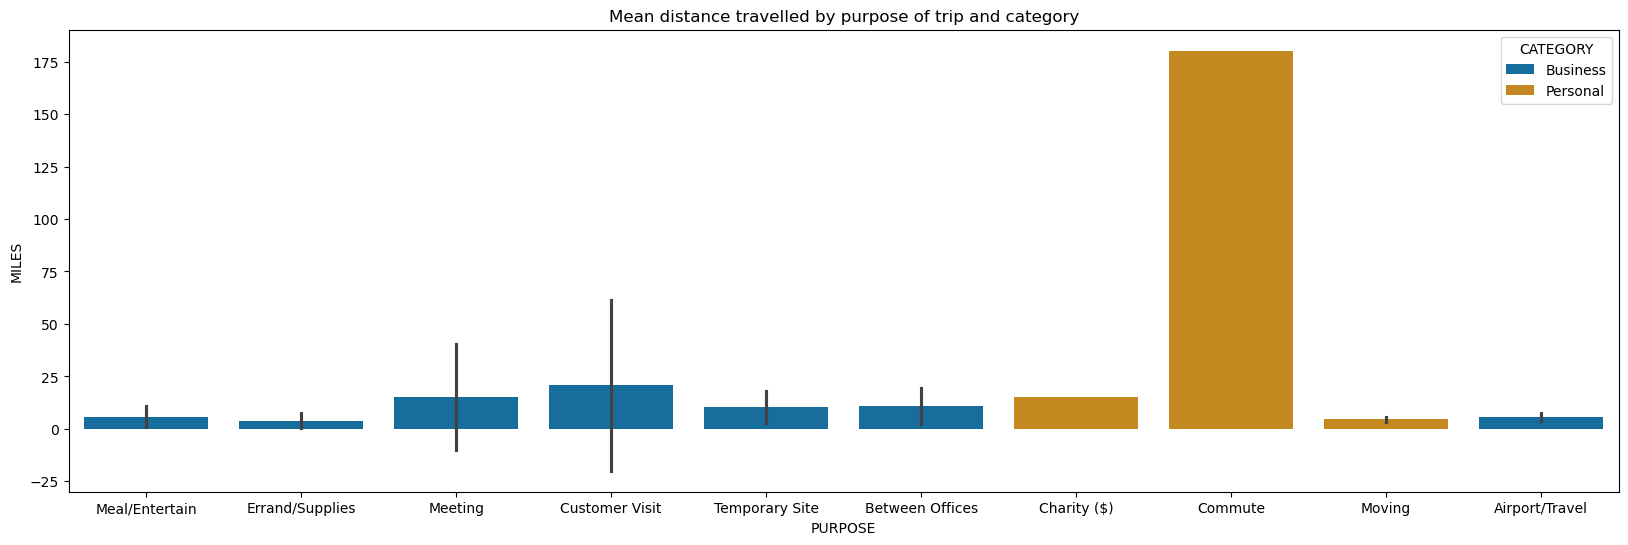

In [13]:
#Plot mean miles against trip purpose and category
plt.figure(figsize= (20,6)) # mean with standard deviation bars
sns.barplot(x= 'PURPOSE', y= 'MILES',hue = 'CATEGORY', data =df, ci='sd', estimator=np.mean, palette='colorblind')
plt.title("Mean distance travelled by purpose of trip and category")
#plt.xticks(rotation=90)
plt.show()

Personal trips were mainly for commuting, which was the furthest distance travelled, however this is only 1 trip so has limited sample size. For business trips the furthest distances travelled were for customer visits and meetings, although the error bars shows this varies. 

### Data Cleaning

##### Check for Duplicates

In [14]:
#check for duplicated rows in data
df[df.duplicated()] 

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
492,6/28/2016 23:34,6/28/2016 23:59,Business,Durham,Cary,9.9,Meeting


In [15]:
#remove duplicated row within dataframe
df.drop_duplicates(inplace = True) 

##### Missing values

In [16]:
#Check for missing values
df.isnull().sum() #check for missing values

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

There are a lot of missing values under Purpose.

In [17]:
#replace the missing or NaN values in purpose column with 'Unknown' 
df["PURPOSE"] = df["PURPOSE"].fillna("Unknown") 

#remove any rows with NaN in any column
df.dropna(inplace = True) 
df.head() #check data

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Unknown
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [18]:
#check data for missing values again
df.isnull().sum() 

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

##### Remove data points

In [19]:
# Drop categories that have low values
drop= ['Commute', 'Charity ($)']

# Dropping rows with specified purposes
df = df[~df['PURPOSE'].isin(drop)]

df['PURPOSE'].unique() #check data

array(['Meal/Entertain', 'Unknown', 'Errand/Supplies', 'Meeting',
       'Customer Visit', 'Temporary Site', 'Between Offices', 'Moving',
       'Airport/Travel'], dtype=object)

## Data Preparation

#### Feature engineering

In [20]:
# Convert the data type to datetime format
df['START_DATE'] = pd.to_datetime(df['START_DATE'], format='mixed')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], format='mixed')

#Create new features to analyse and visualise the data
#Create new feature for time of the trip
df['TIME_DAY'] = df['START_DATE'].apply(lambda i : i.hour)
df['TIME_OF_DAY'] = df['START_DATE'].apply(lambda i : i.hour)
df['TIME_OF_DAY'] = pd.cut(x = df['TIME_OF_DAY'], bins = [0, 6, 11, 17, 21, 24],\
                             labels = ['Night', 'Morning','Afternoon','Evening','Night'], ordered = False)

#Create new feature for month of the trip
df['MONTH_OF_THE_RIDE'] = df['START_DATE'].apply(lambda i : i.month)
month_label = {1: 'Jan', 1.0: 'Jan', 2: 'Feb', 2.0: 'Feb', 3: 'Mar', 3.0: 'Mar', 4: 'April', 4.0: 'April', 
               5: 'May', 5.0: 'May', 6: 'June', 6.0: 'June', 7: 'July', 7.0: 'July', 8: 'Aug', 8.0: 'Aug', 
               9: 'Sep', 9.0: 'Sep', 10: 'Oct', 10.0: 'Oct', 11: 'Nov', 11.0: 'Nov', 12: 'Dec', 12.0: 'Dec'}
df['MONTH_OF_THE_RIDE'] = df['MONTH_OF_THE_RIDE'].map(month_label)

#Create new feature for the day of the week of the trip
df['DAY_OF_THE_RIDE'] = df['START_DATE'].apply(lambda i : i.weekday())
day_label = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

df['DAY_OF_THE_RIDE'] = df['DAY_OF_THE_RIDE'].map(day_label)

# Create new feature for duration of the trip
df['DURATION_OF_THE_RIDE'] = (df['END_DATE'] - df['START_DATE']) / pd.Timedelta(minutes=1)
df.dropna(inplace = True) #remove any null values

df.head()#check top of data

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TIME_DAY,TIME_OF_DAY,MONTH_OF_THE_RIDE,DAY_OF_THE_RIDE,DURATION_OF_THE_RIDE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,Evening,Jan,Friday,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,1,Night,Jan,Saturday,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,Evening,Jan,Saturday,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,Afternoon,Jan,Tuesday,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,Afternoon,Jan,Wednesday,67.0


#### Checking for outliers

<Axes: xlabel='MILES'>

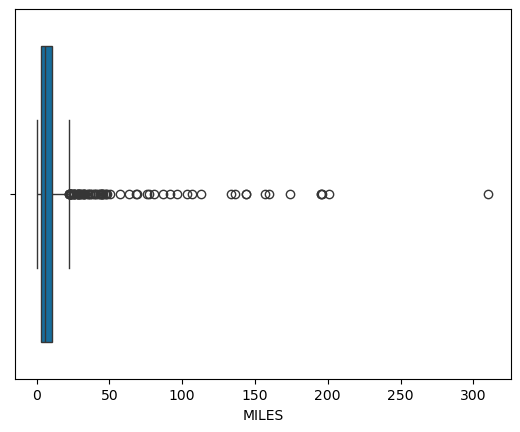

In [21]:
#Create box plot for miles
sns.boxplot(x=df['MILES'],data = df, palette='colorblind')

The distance travelled is typically short with the exception of some outliers where longer trips are occasionally taken. 

<Axes: xlabel='TIME_OF_DAY', ylabel='MILES'>

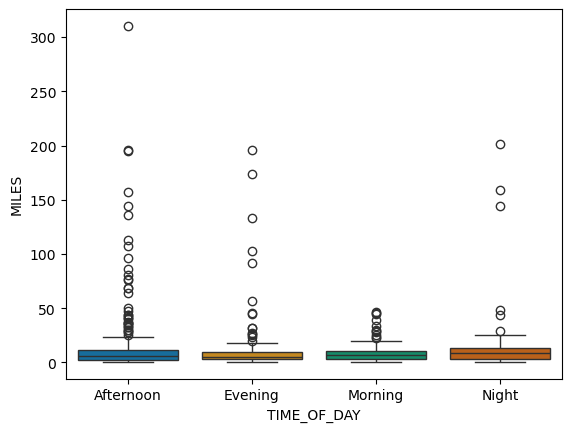

In [22]:
#Create box plot to check number of miles and time of day
sns.boxplot(x=df['TIME_OF_DAY'],y=df['MILES'], palette='colorblind')

The data for miles travelled at different times of the day are relatively close together with most data points clustered near the median, indicating typical ride duration, with a number of outliers that indicate some occasionally long trips. 

<Axes: xlabel='DURATION_OF_THE_RIDE'>

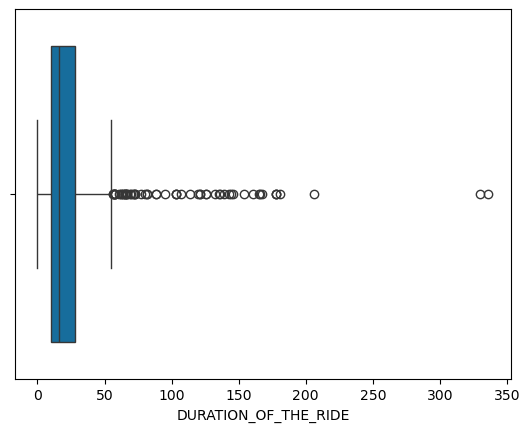

In [23]:
#create box plot for trip duration to check for outliers
sns.boxplot(x=df['DURATION_OF_THE_RIDE'],data=df, palette='colorblind')

<Axes: xlabel='TIME_OF_DAY', ylabel='DURATION_OF_THE_RIDE'>

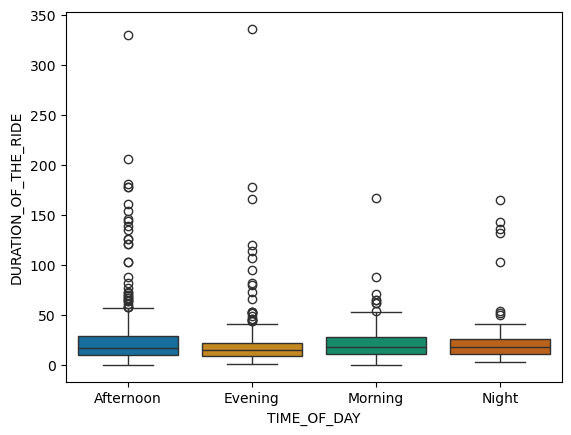

In [24]:
#Create box plot to check duration of the trip against time of day
sns.boxplot(x=df['TIME_OF_DAY'],y=df['DURATION_OF_THE_RIDE'], palette='colorblind')

Most trips tend to be short, however there are some outliers that are significantly longer in duration. 

#### Remove outliers

In [25]:
# Calculate the first quartile (Q1) and third quartile (Q3) for 'MILES' column
Q1 = df['MILES'].quantile(0.25)
Q3 = df['MILES'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows where 'MILES' is outside the bounds
df = df[(df['MILES'] >= lower_bound) & (df['MILES'] <= upper_bound)]

<Axes: xlabel='MILES'>

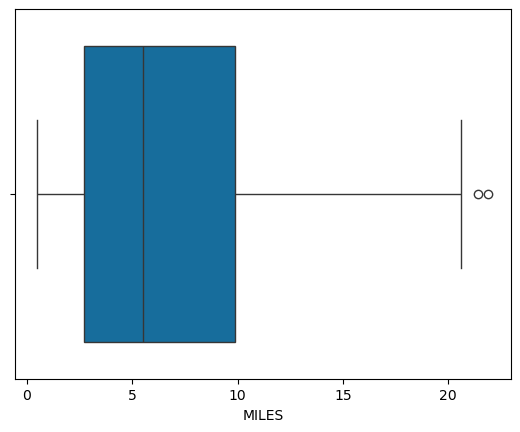

In [26]:
#Create box plot for miles with outliers removed
sns.boxplot(x=df['MILES'],data = df, palette='colorblind')

#### Data visualisation

##### Distance travelled

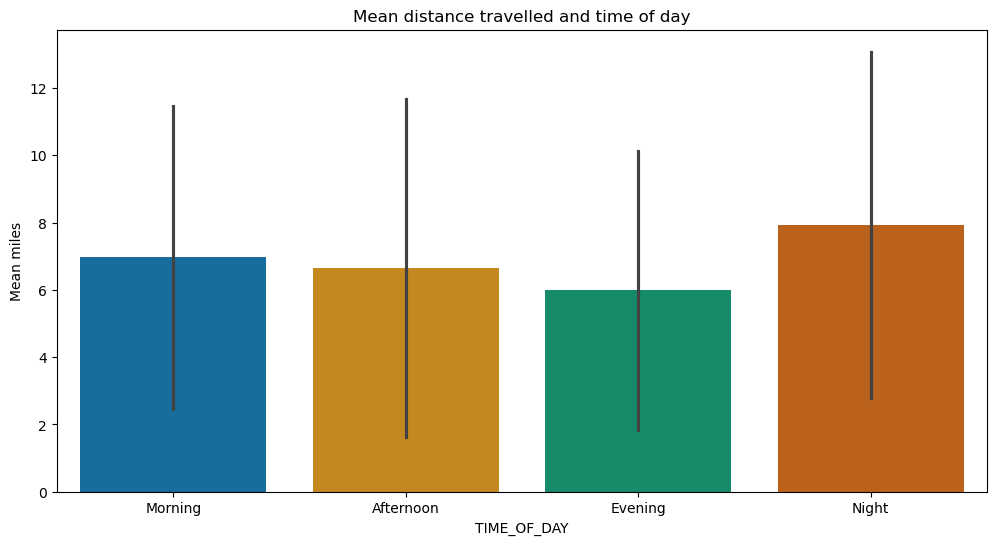

In [27]:
# Define order of the times of day
times_of_day = ['Morning', 'Afternoon', 'Evening', 'Night']

# Convert the 'TIME_OF_DAY' column to a categorical type with the defined order
df['TIME_OF_DAY'] = pd.Categorical(df['TIME_OF_DAY'], categories=times_of_day, ordered=True)

# 'TIME_OF_DAY' ordered
df = df.sort_values('TIME_OF_DAY')

#Plot mean miles against time of day
plt.figure(figsize=(12,6)) # mean with standard deviation bars
sns.barplot(x= 'TIME_OF_DAY', y= 'MILES', data =df, ci='sd', estimator=np.mean, palette='colorblind')
plt.title("Mean distance travelled and time of day")
plt.ylabel('Mean miles')
plt.show()

The distance travelled is highest at night and lowest in the evening. Error bars show high variability in distance travelled on the trips.

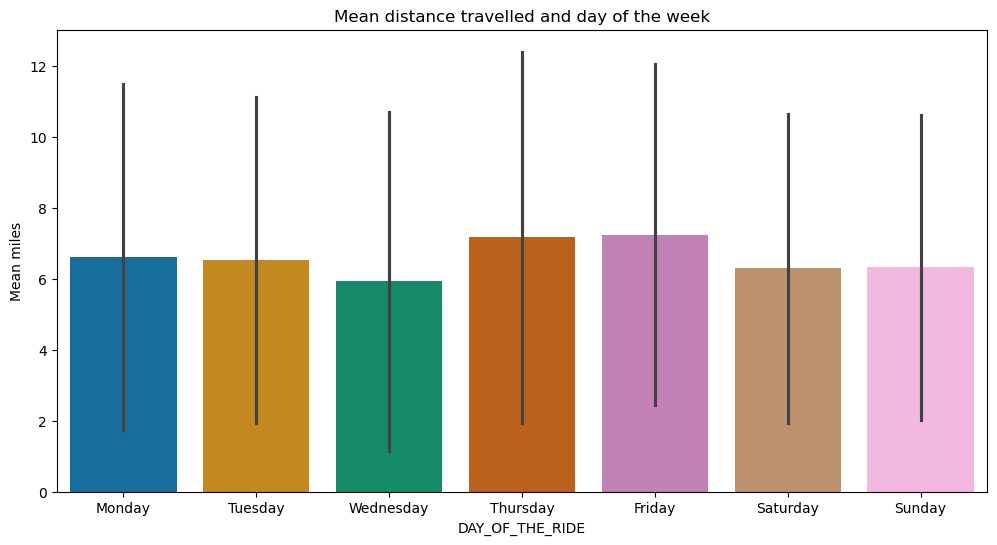

In [28]:
# Define the order of the days
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert the 'DAY_OF_RIDE' column to a categorical type with defined order
df['DAY_OF_THE_RIDE'] = pd.Categorical(df['DAY_OF_THE_RIDE'], categories=days, ordered=True)

#Day of ride is ordered
df = df.sort_values('DAY_OF_THE_RIDE')

#Plot mean miles against day of the week
plt.figure(figsize=(12,6)) # mean with standard deviation bars
sns.barplot(x= 'DAY_OF_THE_RIDE', y= 'MILES', data =df, ci='sd', estimator=np.mean, palette='colorblind')
plt.title("Mean distance travelled and day of the week")
plt.ylabel('Mean miles')
plt.show()


Thursday and Friday have the highest number of miles travelled with Wednesday the lowest, however the error bars show high variability across all days. 

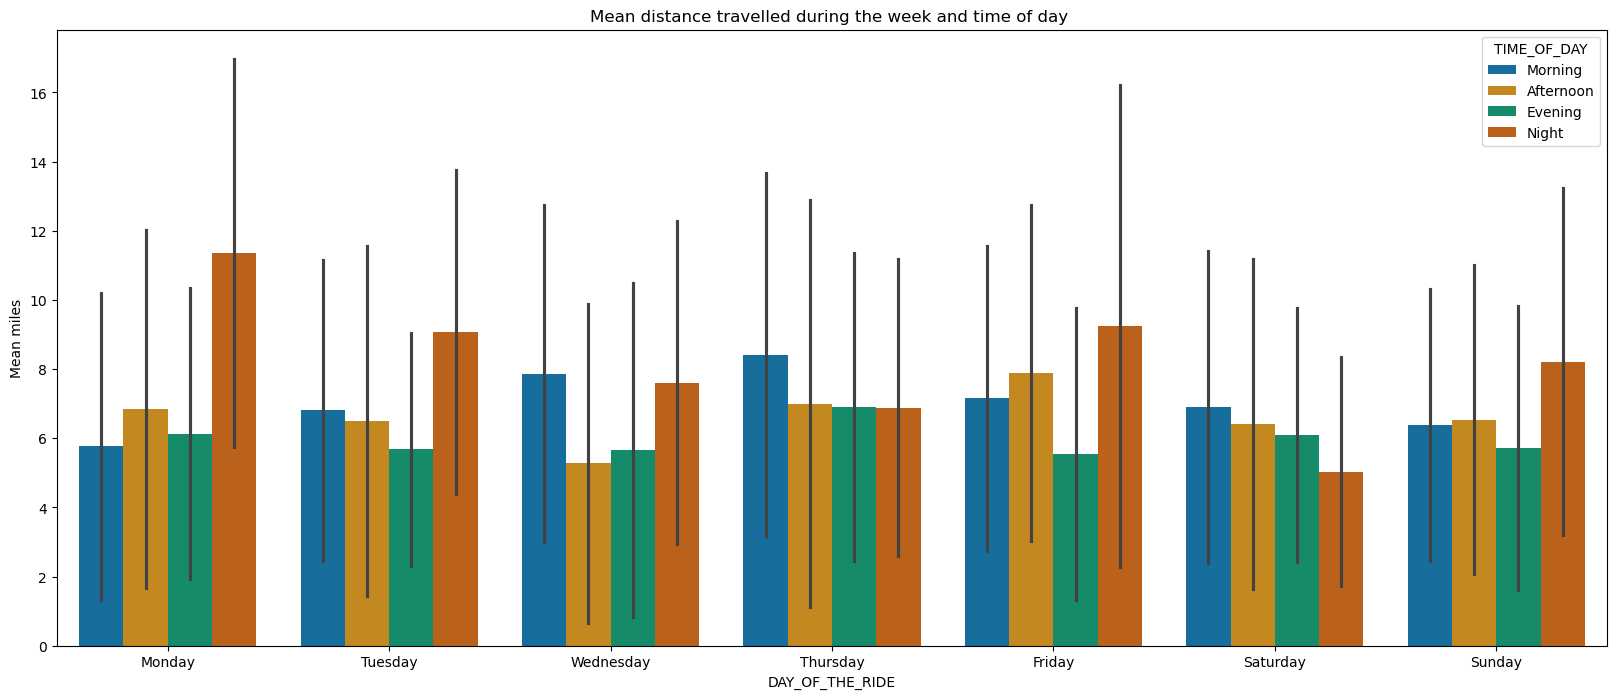

In [29]:
# Plot mean distance travelled against time of day and week
plt.figure(figsize=(20, 8))
sns.barplot(x='DAY_OF_THE_RIDE', y='MILES', hue='TIME_OF_DAY', data=df, palette='colorblind', ci='sd')
plt.title("Mean distance travelled during the week and time of day ")
plt.ylabel('Mean miles')
plt.show()

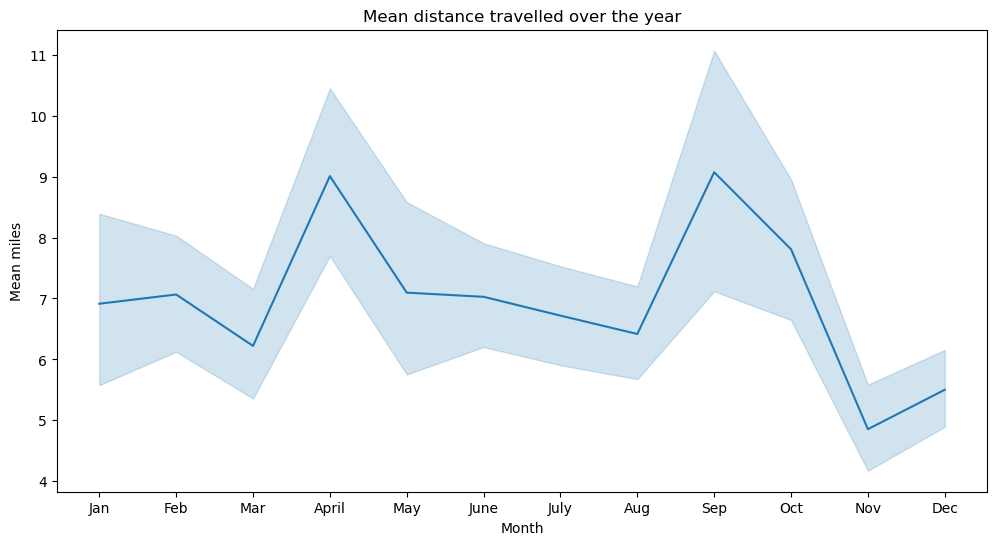

In [30]:
# Define the order of months
months_ = ['Jan', 'Feb', 'Mar', 'April', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert the 'MONTH_OF_RIDE' column to a categorical type with defined order
df['MONTH_OF_THE_RIDE'] = pd.Categorical(df['MONTH_OF_THE_RIDE'], categories=months_, ordered=True)

#Day of ride is ordered
df = df.sort_values('MONTH_OF_THE_RIDE')

plt.figure(figsize=(12, 6))
sns.lineplot(x='MONTH_OF_THE_RIDE', y='MILES', data=df)
plt.title('Mean distance travelled over the year')
plt.xlabel('Month')
plt.ylabel('Mean miles')
plt.show()

April, September and October have the longest mean distances travelled and November and December with the shortest distances travelled.

##### Distance travelled and purpose for trip

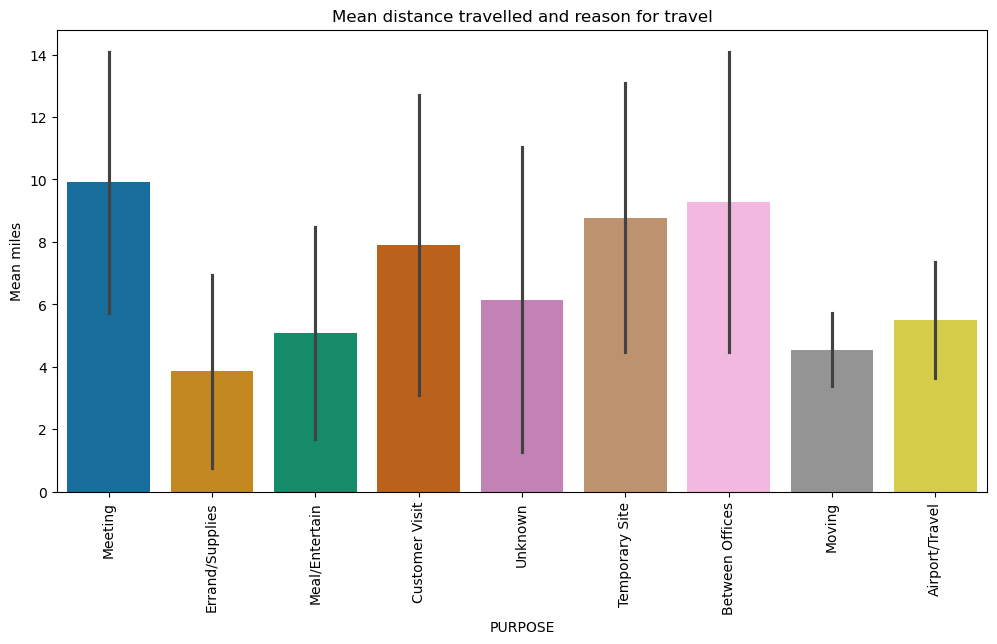

In [31]:
#Plot mean miles against purpose
plt.figure(figsize=(12,6)) # mean with standard deviation bars
sns.barplot(x= 'PURPOSE', y= 'MILES', data =df, ci='sd', estimator=np.mean, palette='colorblind')
plt.title("Mean distance travelled and reason for travel")
plt.ylabel('Mean miles')
plt.xticks(rotation=90)
plt.show()


Travel for meetings, between offices and temporary sites have the longest mean distances travelled per trip. Errands/supplies and moving had the shortest mean distances travelled per trip.

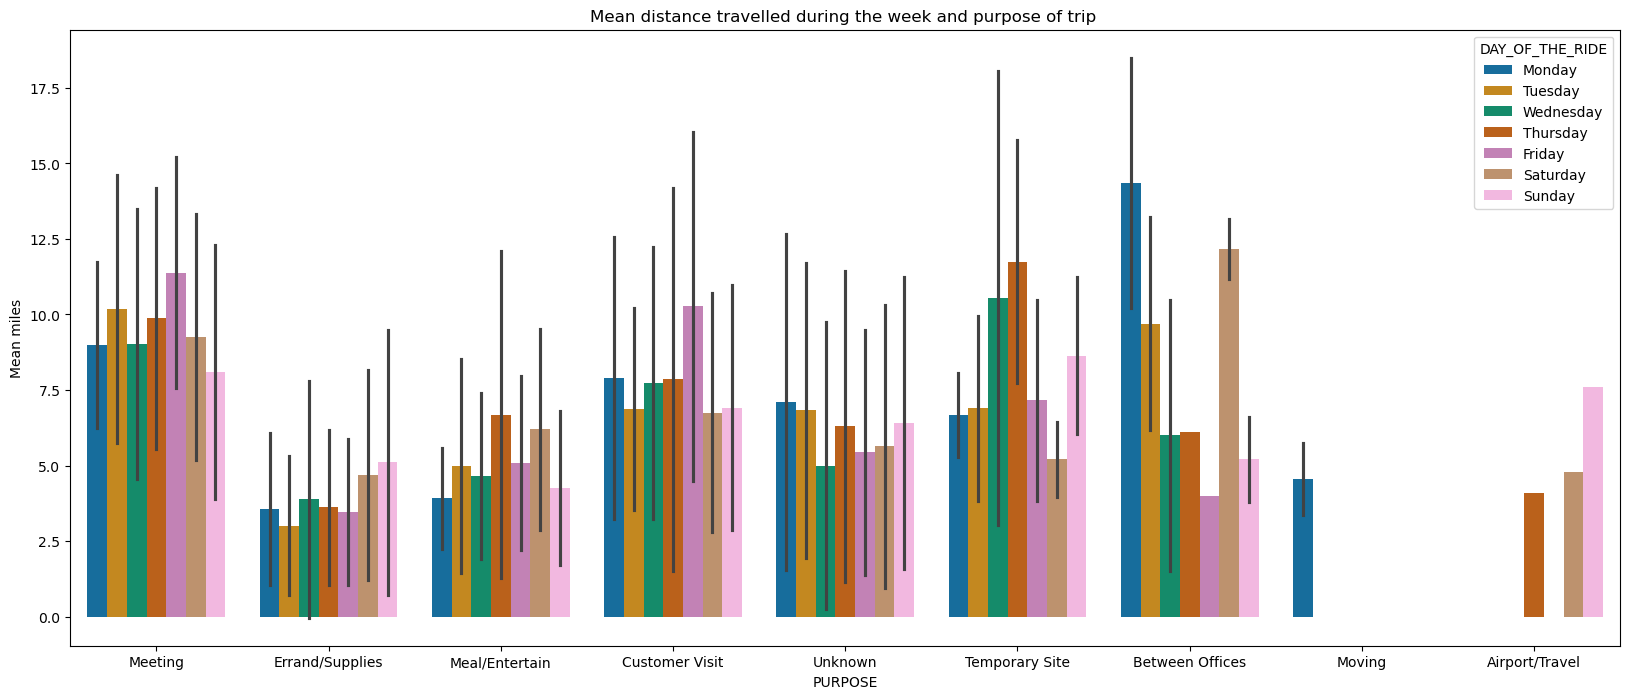

In [32]:
# Plot mean distance travelled against purpose for trip and day of the ride
plt.figure(figsize=(20, 8))
sns.barplot(x='PURPOSE', y='MILES', hue='DAY_OF_THE_RIDE', data=df, palette='colorblind', ci='sd')
plt.title("Mean distance travelled during the week and purpose of trip ")
plt.ylabel('Mean miles')
plt.show()

Trips between offices has the longest mean distances travelled particularly on Monday and Saturday. Across the week the meetings are generally longer distances travelled compared to others, particulary on Friday, Tuesday and Thursdays. Distances travelled for errands/supplies are relatively short throughout the week, which suggest that these are close to the office or home. 

##### Trip duration and purpose for trip

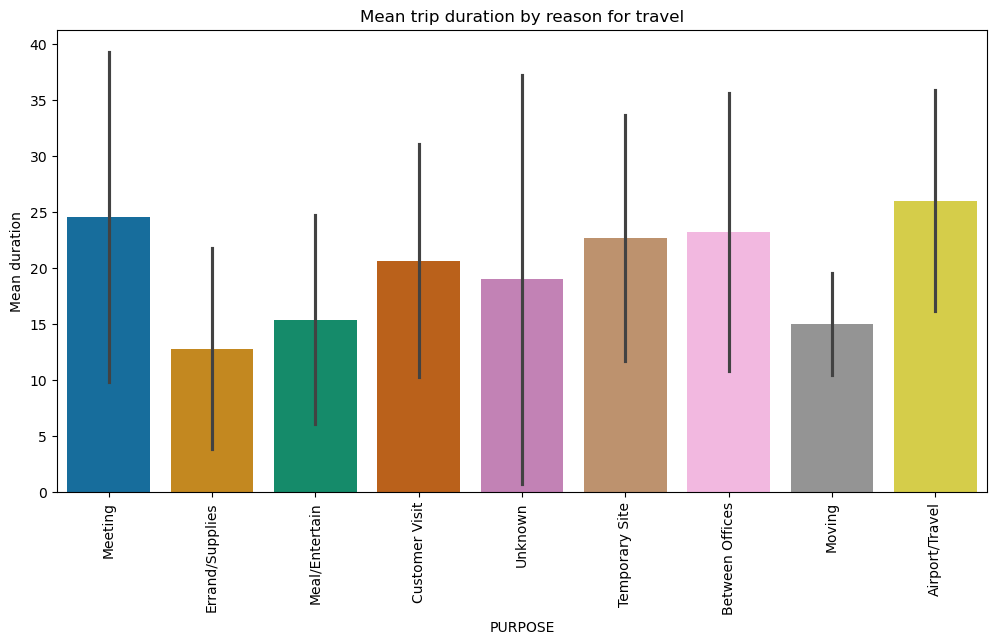

In [33]:
# Plot mean ride duration with error bars representing standard deviation
plt.figure(figsize=(12,6)) # mean with standard deviation bars
sns.barplot(x= 'PURPOSE', y= 'DURATION_OF_THE_RIDE', data =df, ci='sd', estimator=np.mean, palette='colorblind')
plt.title("Mean trip duration by reason for travel")
plt.ylabel('Mean duration')
plt.xticks(rotation=90)
plt.show()

The duration of the trips were highest for airport/travel and meetings, with errand/supplies trips being shorter mean duration per trip.

##### Number of trips

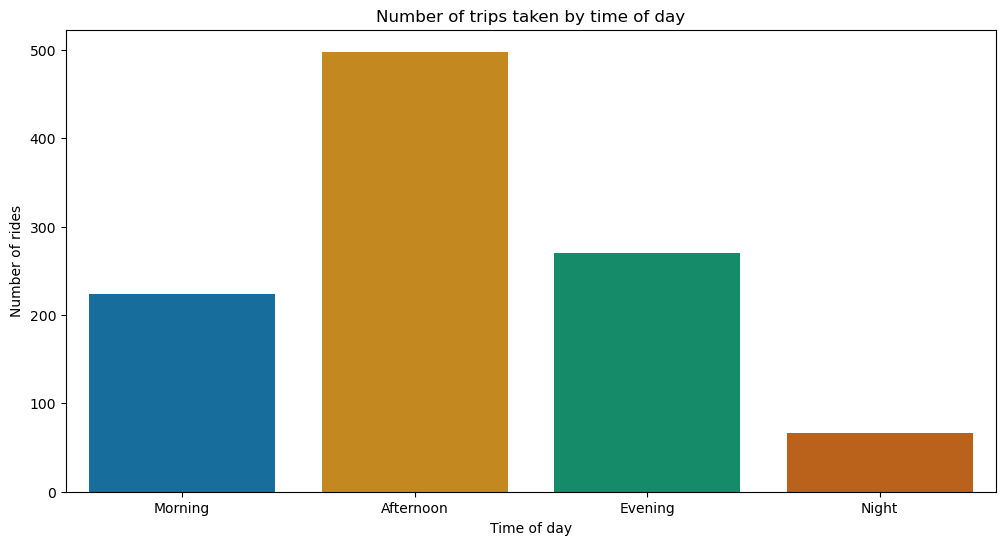

In [34]:
#Plot number of trips by time of day
plt.figure(figsize=(12, 6))

sns.countplot(x='TIME_OF_DAY', data=df, palette='colorblind')
plt.title('Number of trips taken by time of day')
plt.xlabel('Time of day')
plt.ylabel('Number of rides')
plt.show()

The highest number of trips were taken in the afternoon and the least during the night. 

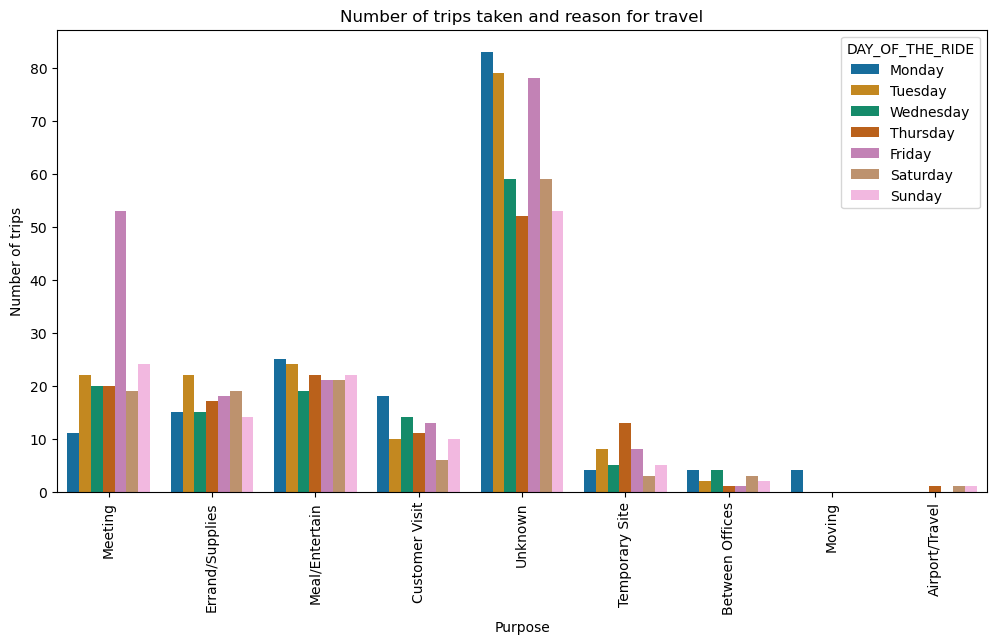

In [35]:
plt.figure(figsize=(12, 6))

sns.countplot(x='PURPOSE', data=df, hue = 'DAY_OF_THE_RIDE', palette='colorblind')
plt.title('Number of trips taken and reason for travel')
plt.xlabel('Purpose')
plt.ylabel('Number of trips')
plt.xticks(rotation=90)
plt.show()

The highest number of trips come under unknown. Meetings, Meal/entertain and Errand/supplies are reasons for the highest number of trips taken. 

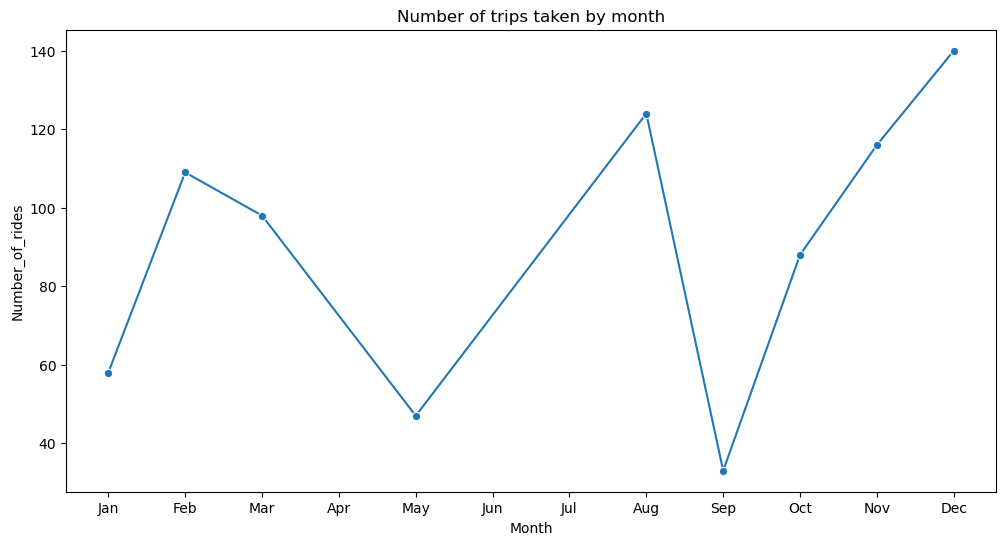

In [36]:
#Calculate the number of rides for each month
rides_per_month = df['MONTH_OF_THE_RIDE'].value_counts().reset_index()
rides_per_month.columns = ['MONTH_OF_THE_RIDE', 'Number_of_rides']

# Sort the data by month for proper plotting
rides_per_month['MONTH_OF_THE_RIDE'] = pd.Categorical(rides_per_month['MONTH_OF_THE_RIDE'], categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ordered=True)
rides_per_month = rides_per_month.sort_values('MONTH_OF_THE_RIDE')

# Plot the number of rides per month
plt.figure(figsize=(12, 6))
sns.lineplot(x='MONTH_OF_THE_RIDE', y='Number_of_rides', data=rides_per_month, marker='o')
plt.title('Number of trips taken by month')
plt.xlabel('Month')
plt.show()

The number of trips taken peaks during February, August and November and December with marked drops in trips during May and September. Need more data over a few years to see if there is a pattern for Uber use at different times of year.

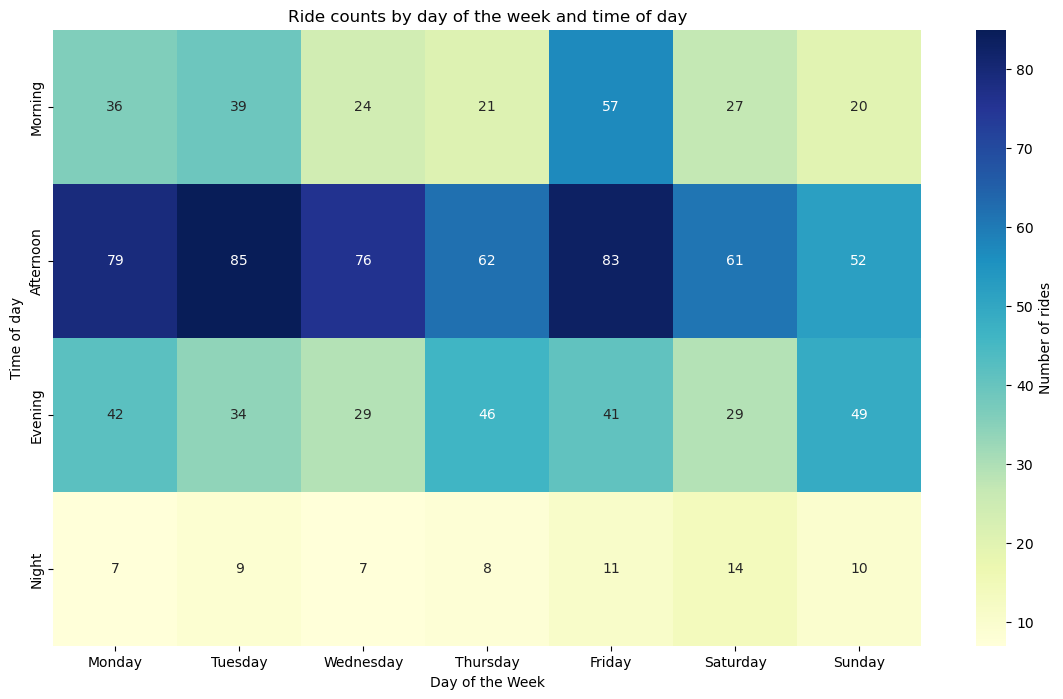

In [37]:
#Heatmap showing the trip counts by time of day and day of the trip
heatmap_data = df.groupby(['TIME_OF_DAY', 'DAY_OF_THE_RIDE']).size().unstack()
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='g', cbar_kws={'label': 'Number of rides'})
plt.title('Ride counts by day of the week and time of day')
plt.xlabel('Day of the Week')
plt.ylabel('Time of day')
plt.show()

There are more trips taken during the afternoon during the week, with Tuesday and Friday being the highest. Less trips taken at night. 

#### Check for correlations

In [38]:
from pandas.plotting import scatter_matrix

<function matplotlib.pyplot.show(close=None, block=None)>

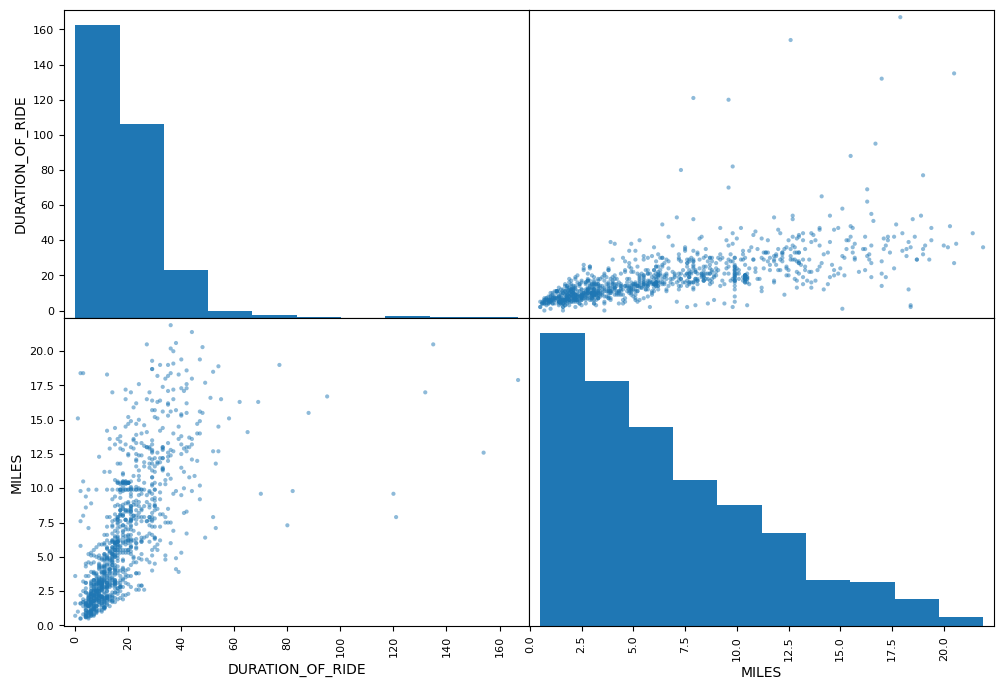

In [39]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'])
df['END_DATE'] = pd.to_datetime(df['END_DATE'])
df['DURATION_OF_RIDE'] = (df['END_DATE'] - df['START_DATE']).dt.total_seconds() / 60  # Duration in minutes

attributes = ['DURATION_OF_RIDE', 'MILES'] #check correlations between these listed features
scatter_matrix(df[attributes], figsize=(12,8))
plt.show

Duration of ride and miles look correlated as they show similar information.

#### Create new data frame

In [40]:
# Calculate mean miles travelled based on 'TIME_OF_DAY', 'MONTH_OF_THE_RIDE', and 'DAY_OF_THE_RIDE'
grouped_data = df.groupby(['TIME_OF_DAY', 'MONTH_OF_THE_RIDE', 'DAY_OF_THE_RIDE'])
mean_miles = grouped_data['MILES'].mean().reset_index()
mean_miles.rename(columns={'MILES': 'MEAN_MILES'}, inplace=True)

# Calculate number of rides based on 'TIME_OF_DAY', 'MONTH_OF_THE_RIDE', and 'DAY_OF_THE_RIDE'
ride_count = df.groupby(['TIME_OF_DAY', 'MONTH_OF_THE_RIDE', 'DAY_OF_THE_RIDE']).size().reset_index(name='COUNT')

# Merge the mean miles data with the original DataFrame
df_merged = pd.merge(df, mean_miles, on=['TIME_OF_DAY', 'MONTH_OF_THE_RIDE', 'DAY_OF_THE_RIDE'], how='left')
df_merged = pd.merge(df_merged, ride_count, on=['TIME_OF_DAY', 'MONTH_OF_THE_RIDE', 'DAY_OF_THE_RIDE'], how='left')

# Fill missing values with 0 for both MEAN_MILES and COUNT columns
df_merged['MEAN_MILES'].fillna(0, inplace=True)
df_merged['COUNT'].fillna(0, inplace=True)

<h3> Model Building </h3>

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import cross_validate, KFold
from sklearn.model_selection import cross_val_score

##### Model 1: Random Forest Regressor

<h5> Random Forest Regressor to predict the MEAN_MILES travelled </h5>

In [42]:
# Select relevant features and perform one-hot encoding to convert non-numerical data to numerical
features = ['TIME_OF_DAY', 'MONTH_OF_THE_RIDE', 'DAY_OF_THE_RIDE']
df_encoded = pd.get_dummies(df_merged[features])

# Split data into features and target variable
X = df_encoded
y = df_merged['MEAN_MILES']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #42 generates same data each time run

# Initialize and train Random Forest Regression model
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)


Selected features: TIME_OF_DAY, MONTH_OF_THE_RIDE, and DAY_OF_THE_RIDE. Converted non-numerical data to numerical with one-hot encoding. Split dataset into features (X) and target (y) for mean miles travelled. Employed 80-20 split for training and testing. Used Random Forest Regression with 100 trees for prediction.

##### Model 1: Model evaluation

Train-test split Metrics:
Mean Squared Error (MSE): 1.0391014425132934
Root Mean Squared Error (RMSE): 1.0193632534642856
Mean Absolute Error (MAE): 0.4237639950065676
R-squared (R2) Score: 0.8468506382979346

Cross-Validation Metrics:
MSE: Mean = 2.095
RMSE: Mean = 1.403
MAE: Mean = 0.473
R2: Mean = 0.723


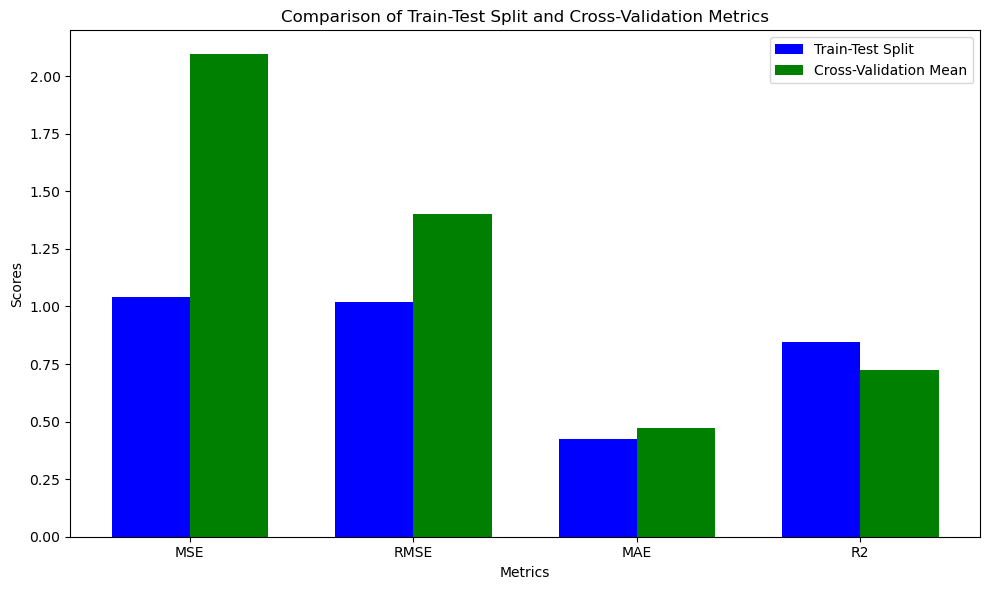

In [43]:
# Calculate evaluation metrics of train-test split 
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the train-test split results
print("Train-test split Metrics:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)


# Calculate evaluation metrics of Cross-Validation 
cv = KFold(n_splits=5, random_state=42, shuffle=True)
scoring = {
    'MSE': make_scorer(mean_squared_error),
    'RMSE': make_scorer(lambda y_true, y_pred: mean_squared_error(y_true, y_pred, squared=False)),
    'MAE': make_scorer(mean_absolute_error),
    'R2': make_scorer(r2_score)
}

cv_results = cross_validate(regressor, X, y, cv=cv, scoring=scoring, return_train_score=False)

# Print cross-validation results
print("\nCross-Validation Metrics:")
for metric in ['test_MSE', 'test_RMSE', 'test_MAE', 'test_R2']:
    scores = cv_results[metric]
    print(f"{metric.replace('test_', '')}: Mean = {np.mean(scores):.3f}")



#Combined Visualization of Train-Test and Cross-Validation Metrics

# Metrics names
metrics = ['MSE', 'RMSE', 'MAE', 'R2']

# Train-test split results
train_test_results = [mse, rmse, mae, r2]

# Cross-validation mean results
cv_means = [
    np.mean(cv_results['test_MSE']),
    np.mean(cv_results['test_RMSE']),
    np.mean(cv_results['test_MAE']),
    np.mean(cv_results['test_R2'])
]

# Set up data for grouped bars
x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, train_test_results, width, label='Train-Test Split', color='blue')
rects2 = ax.bar(x + width/2, cv_means, width, label='Cross-Validation Mean', color='green')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Train-Test Split and Cross-Validation Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

fig.tight_layout()
plt.show()

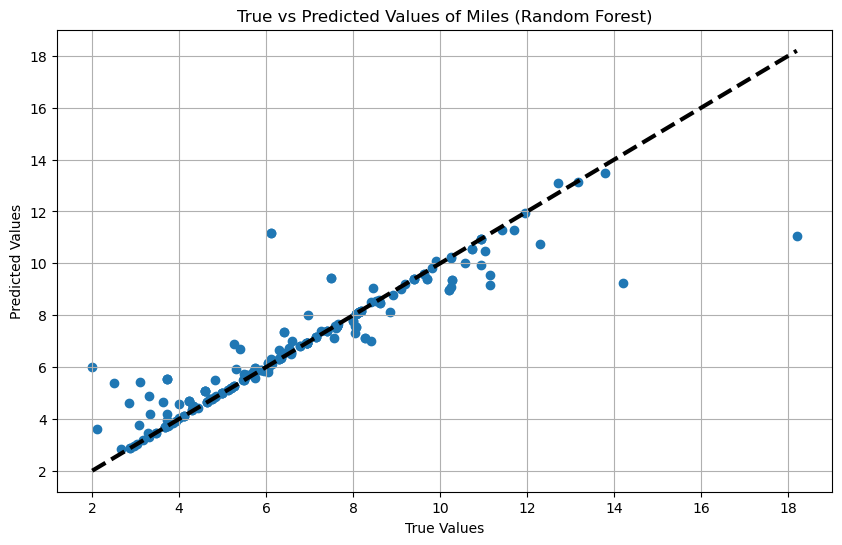

In [44]:
# Plotting the predicted vs true values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=3)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values of Miles (Random Forest)')
plt.grid(True)
plt.show()


Each dot on the graph shows one prediction. Ideally, they'd all line up perfectly along a diagonal. But here, most dots are below that line, meaning the model underestimated (where the actual value is higher than the predicted value). Sometimes, it overestimated, but not as much. The model overall has predicted well with a few exceptions. 

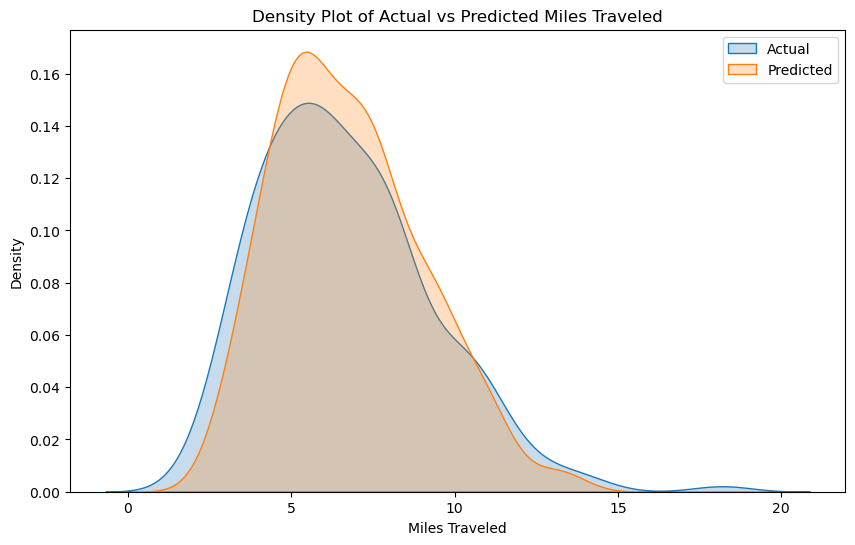

In [45]:
# Plotting density plot of actual and predicted miles traveled
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label='Actual', shade=True)
sns.kdeplot(y_pred, label='Predicted', shade=True)
plt.title('Density Plot of Actual vs Predicted Miles Traveled')
plt.xlabel('Miles Traveled')
plt.ylabel('Density')
plt.legend()
plt.show()

There is a higher concentration of data points where the actual miles travelled is greater than the predicted miles travelled.

##### Feature importance score of model 1

In [46]:
# Create a placeholder DataFrame for demonstration purposes
feature_importance_data = {
    'Feature': ['MONTH_OF_THE_RIDE_1', 'MONTH_OF_THE_RIDE_2', 'DAY_OF_THE_RIDE_1', 'DAY_OF_THE_RIDE_2', 'TIME_OF_DAY_1', 'TIME_OF_DAY_2'],
    'Importance': [0.1, 0.2, 0.15, 0.25, 0.12, 0.18]
}
feature_importance_df = pd.DataFrame(feature_importance_data)

# Filter features related to 'MONTH_OF_THE_RIDE', 'DAY_OF_THE_RIDE', and 'TIME_OF_DAY'
month_features = feature_importance_df[feature_importance_df['Feature'].str.startswith('MONTH_OF_THE_RIDE')]
day_features = feature_importance_df[feature_importance_df['Feature'].str.startswith('DAY_OF_THE_RIDE')]
time_features = feature_importance_df[feature_importance_df['Feature'].str.startswith('TIME_OF_DAY')]
# mean_miles_feature = feature_importance_df[feature_importance_df['Feature'] == 'MEAN_MILES']

# Calculate total importance for each group
total_month_importance = month_features['Importance'].sum()
total_day_importance = day_features['Importance'].sum()
total_time_importance = time_features['Importance'].sum()
# total_mean_miles_importance = mean_miles_feature['Importance'].values[0]

# print("Total Importance of Feature 'MEAN_MILES':", total_mean_miles_importance)
print("Total Importance of Features related to MONTH_OF_THE_RIDE:", total_month_importance)
print("Total Importance of Features related to DAY_OF_THE_RIDE:", total_day_importance)
print("Total Importance of Features related to TIME_OF_DAY:", total_time_importance)

Total Importance of Features related to MONTH_OF_THE_RIDE: 0.30000000000000004
Total Importance of Features related to DAY_OF_THE_RIDE: 0.4
Total Importance of Features related to TIME_OF_DAY: 0.3


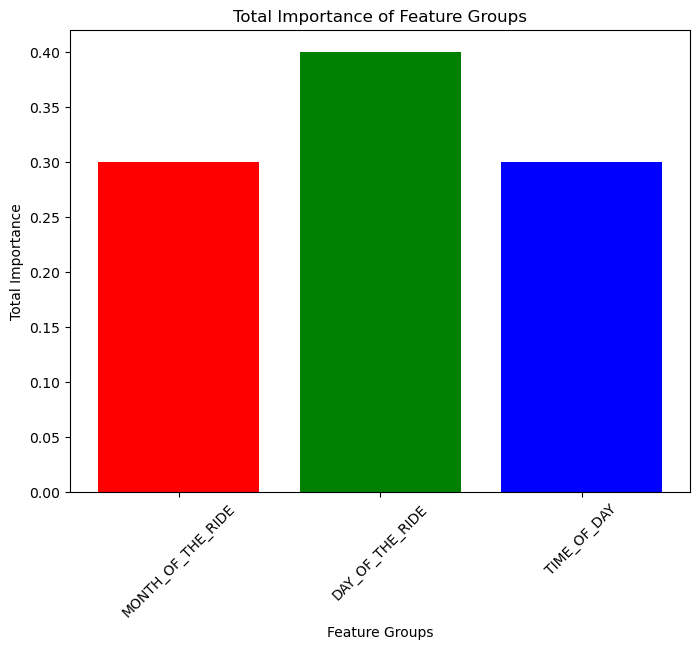

In [47]:
#Visualise total importance of feature groups of Model 1

labels = ['MONTH_OF_THE_RIDE', 'DAY_OF_THE_RIDE', 'TIME_OF_DAY']
importances = [total_month_importance, total_day_importance, total_time_importance]

# Creating the bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, importances, color=['red', 'green', 'blue'])
plt.xlabel('Feature Groups')
plt.ylabel('Total Importance')
plt.title('Total Importance of Feature Groups')
plt.xticks(rotation=45)  # Rotating the labels for better readability
plt.show()

#### Residual Plot

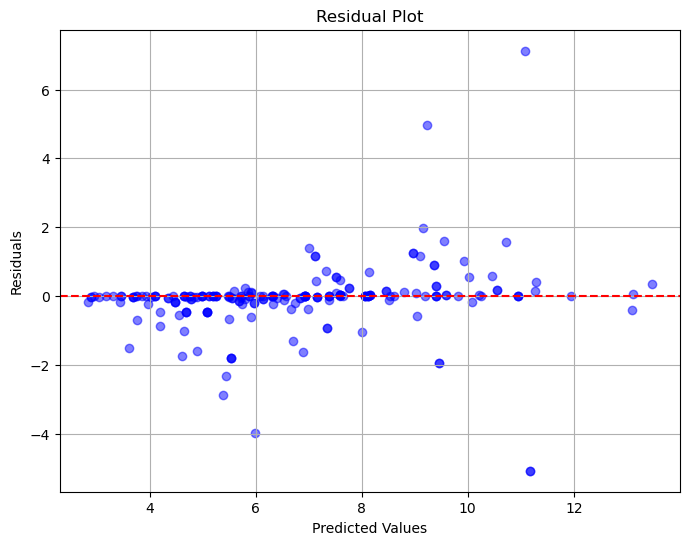

In [48]:
# Compute residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


In an ideal residual plot, points scatter randomly around the y = 0 line, showing random errors and a good model fit. Here they show a slight trend where errors increase as predicted values increase.

Remove Outliers from COUNT

In [49]:
# Calculate the first quartile (Q1) and third quartile (Q3) for 'COUNT' column
Q1_count = df_merged['COUNT'].quantile(0.25)
Q3_count = df_merged['COUNT'].quantile(0.75)

# Calculate the Interquartile Range (IQR) for 'COUNT'
IQR_count = Q3_count - Q1_count

# Define the lower and upper bounds to identify outliers for 'COUNT'
lower_bound_count = Q1_count - 1.5 * IQR_count
upper_bound_count = Q3_count + 1.5 * IQR_count

# Filter out rows where 'COUNT' is outside the bounds
df_filtered_count = df_merged[(df_merged['COUNT'] >= lower_bound_count) & (df_merged['COUNT'] <= upper_bound_count)]

<h5> Model 2: Random Forest Regressor to predict the Frequency of Rides(COUNT) </h5>

In [50]:
# Perform one-hot encoding for the selected features
features = ['TIME_OF_DAY', 'MONTH_OF_THE_RIDE', 'DAY_OF_THE_RIDE']
df_encoded_count = pd.get_dummies(df_filtered_count[features])

# Split data into features and target variable
X_count = df_encoded_count
y_count = df_filtered_count['COUNT']

# Split data into training and testing sets
X_train_count, X_test_count, y_train_count, y_test_count = train_test_split(X_count, y_count, test_size=0.2, random_state=42)

# Initialize and train Random Forest Regression model
regressor_count = RandomForestRegressor(n_estimators=100, random_state=42)
regressor_count.fit(X_train_count, y_train_count)

# Make predictions
y_pred_count = regressor_count.predict(X_test_count)

##### Model 2: Model evaluation

Train-test split Metrics:
Mean Squared Error (After Removing Outliers): 0.3700584541062801
Root Mean Squared Error (After Removing Outliers): 0.60832430011161
Mean Absolute Error (After Removing Outliers): 0.25057971014492747
R-squared Score (After Removing Outliers): 0.9720083839089956

Cross-Validation Metrics:
MSE: Mean = 0.382
RMSE: Mean = 0.590
MAE: Mean = 0.250
R2: Mean = 0.970


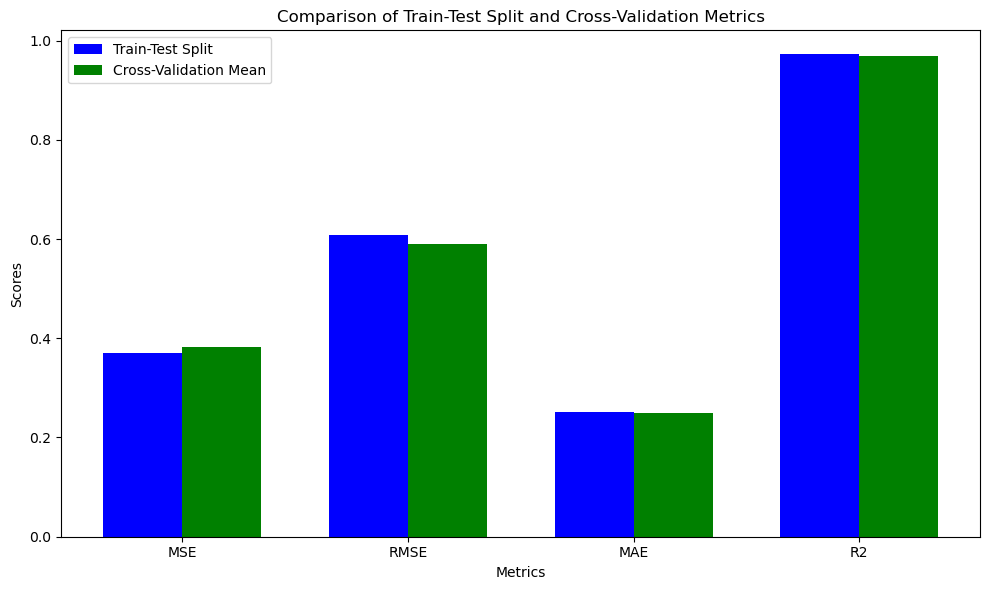

In [51]:
# Calculate evaluation metrics of train-test split 
mse_count = mean_squared_error(y_test_count, y_pred_count)
rmse_count = mean_squared_error(y_test_count, y_pred_count, squared=False)
mae_count = mean_absolute_error(y_test_count, y_pred_count)
r2_count = r2_score(y_test_count, y_pred_count)

print("Train-test split Metrics:")
print("Mean Squared Error (After Removing Outliers):", mse_count)
print("Root Mean Squared Error (After Removing Outliers):", rmse_count)
print("Mean Absolute Error (After Removing Outliers):", mae_count)
print("R-squared Score (After Removing Outliers):", r2_count)


# Calculate evaluation metrics of Cross-Validation 
cv = KFold(n_splits=5, random_state=42, shuffle=True)
scoring = {
    'MSE': make_scorer(mean_squared_error),
    'RMSE': make_scorer(lambda y_true, y_pred: mean_squared_error(y_true, y_pred, squared=False)),
    'MAE': make_scorer(mean_absolute_error),
    'R2': make_scorer(r2_score)
}
cv_results = cross_validate(regressor_count, X_count, y_count, cv=cv, scoring=scoring, return_train_score=False)

print("\nCross-Validation Metrics:")
for metric in ['test_MSE', 'test_RMSE', 'test_MAE', 'test_R2']:
    scores = cv_results[metric]
    print(f"{metric.replace('test_', '')}: Mean = {np.mean(scores):.3f}")


# Compare metrics of train-test split and cross-validation
# Metrics names
metrics = ['MSE', 'RMSE', 'MAE', 'R2']

# Values from the train-test split
train_test_values = [mse_count, rmse_count, mae_count, r2_count]

# Mean values from cross-validation
cv_means = [
    np.mean(cv_results['test_MSE']),
    np.mean(cv_results['test_RMSE']),
    np.mean(cv_results['test_MAE']),
    np.mean(cv_results['test_R2'])
]

#Compare metrics of train-test split and cross-validation
# Setting up data for grouped bars
x = np.arange(len(metrics))  
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, train_test_values, width, label='Train-Test Split', color='blue')
rects2 = ax.bar(x + width/2, cv_means, width, label='Cross-Validation Mean', color='green')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Train-Test Split and Cross-Validation Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

fig.tight_layout()
plt.show()

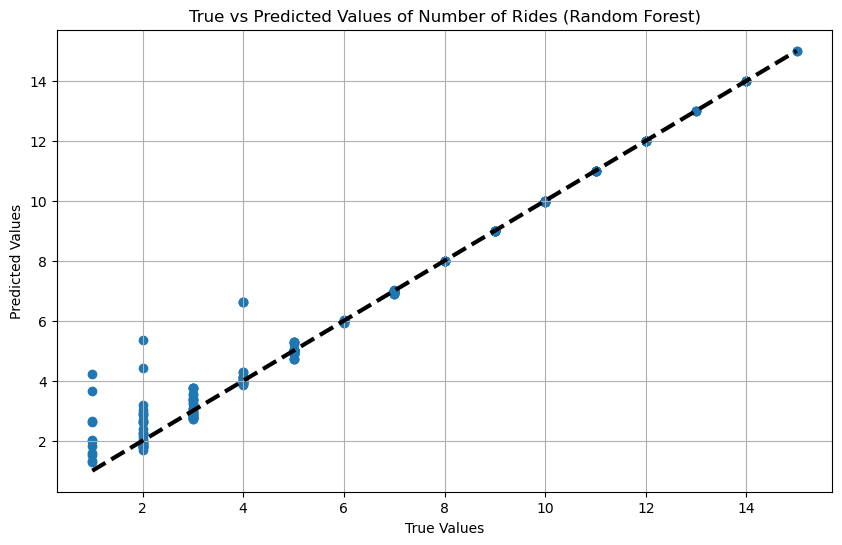

In [52]:
# Plotting the predicted vs true values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_count, y_pred_count)
plt.plot([min(y_test_count), max(y_test_count)], [min(y_test_count), max(y_test_count)], 'k--', lw=3)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values of Number of Rides (Random Forest)')
plt.grid(True)
plt.show()

 It sometimes underestimated (predicted fewer rides) or overestimated (predicted more rides) actual occurrences. The spread of points suggests the model's overall inaccuracy in predicting ride numbers.

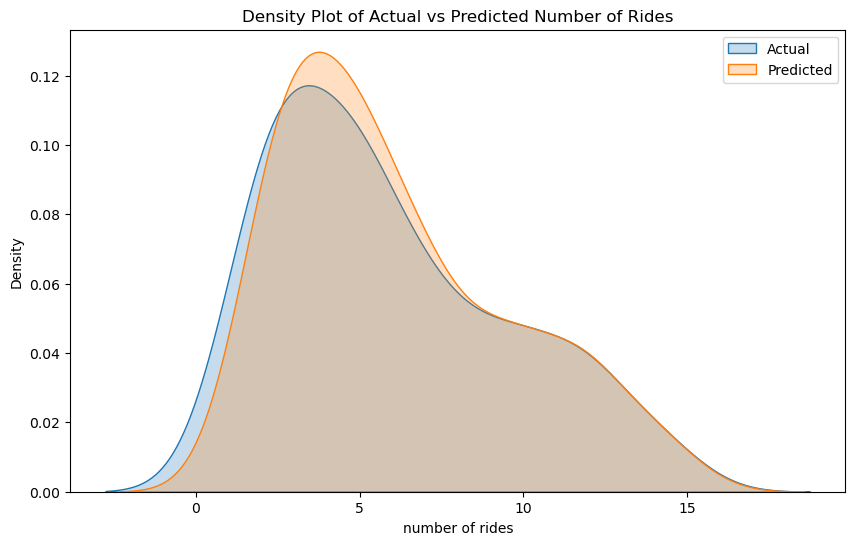

In [53]:
# Plotting density plot of actual and predicted miles traveled
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test_count, label='Actual', shade=True)
sns.kdeplot(y_pred_count, label='Predicted', shade=True)
plt.title('Density Plot of Actual vs Predicted Number of Rides')
plt.xlabel('number of rides')
plt.ylabel('Density')
plt.legend()
plt.show()

There is a higher concentration of data points where the actual number of rides is greater than the predicted number of rides.

##### Feature importance score

Total Importance of Features related to DAY: 0.309
Total Importance of Features related to MONTH: 0.389
Total Importance of Features related to TIME: 0.302


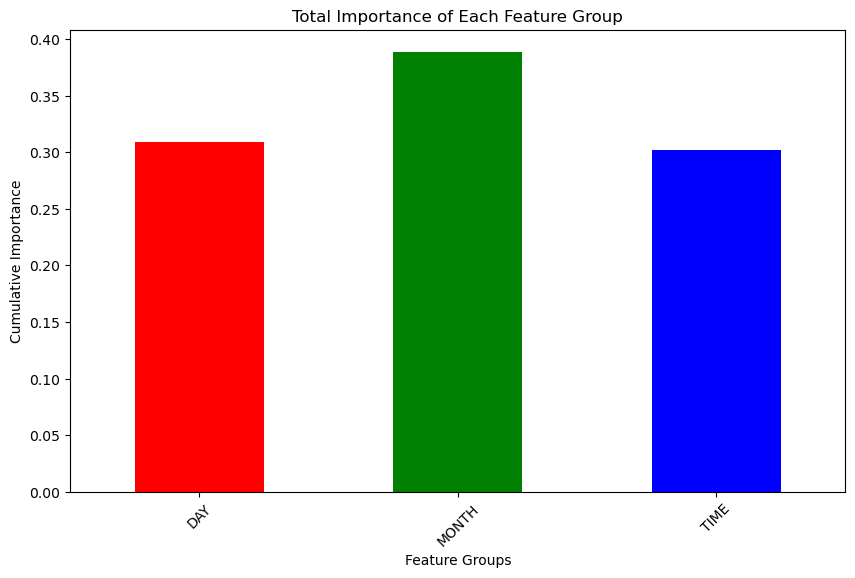

In [54]:
feature_importances = regressor_count.feature_importances_
features = df_encoded_count.columns

# Creating a DataFrame to hold feature names and their importance
importances = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Group features by the original feature names (assuming they start with the group names)
importances['Group'] = importances['Feature'].apply(lambda x: x.split('_')[0])

# Sum the importances within each group
group_importances = importances.groupby('Group').sum()

# Print total importance for each group
for group, data in group_importances.iterrows():
    print(f"Total Importance of Features related to {group}: {data['Importance']:.3f}")


#Visualise total importance of feature groups of Model 2
colors = ['red', 'green', 'blue'] 
# Plotting the group importances
plt.figure(figsize=(10, 6))
group_importances['Importance'].plot(kind='bar', color=colors)
plt.title('Total Importance of Each Feature Group')
plt.ylabel('Cumulative Importance')
plt.xlabel('Feature Groups')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

##### Model 3: Polynomial Regression

<h5>Polynomial Regression to predict the MEAN_MILES travelled </h5>

In [55]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Define the degree of the polynomial
degree = 3  # You can adjust the degree based on the complexity of the relationships in your data

# Transform the features to polynomial features
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X)

# Split data into training and testing sets
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Initialize and train Polynomial Regression model
polynomial_regression = LinearRegression()
polynomial_regression.fit(X_train_poly, y_train)

# Make predictions
y_pred = polynomial_regression.predict(X_test_poly)

# Evaluate model performance
r2_poly = r2_score(y_test, y_pred)
print("R-squared Score (Polynomial Regression):", r2_poly)

R-squared Score (Polynomial Regression): 0.9220181491864512


##### Model 3: Model evaluation

Train-test split Metrics:
Mean Squared Error: 0.5290982134672662
Root Mean Squared Error: 0.72739137571686
Mean Absolute Error: 0.1428343692101169
R-squared Score: 0.9220181491864512

Cross-Validation Metrics:
Cross-Validation Mean Squared Error: 2.709655426290535e+25
Cross-Validation Root Mean Squared Error: 5205435069511.995
Cross-Validation Mean Absolute Error: 3568643994793.357
Cross-Validation R-squared Score: -4.06769652304791e+24


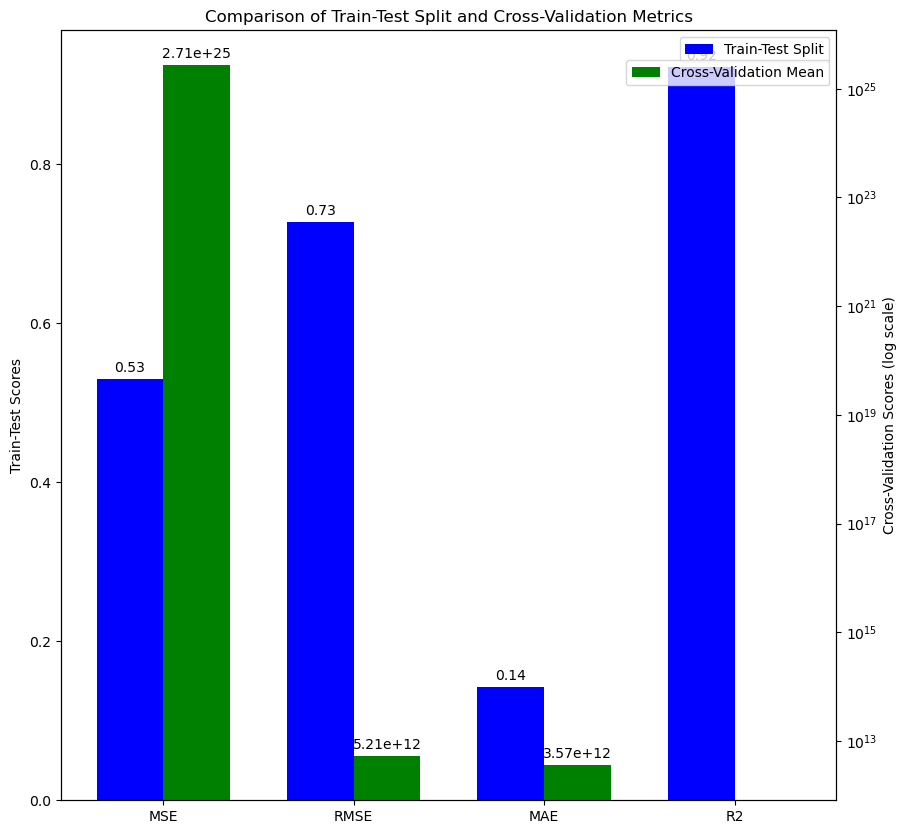

In [56]:
# Evaluate model performance by train-test split
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Train-test split Metrics:")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)


# Evaluate model performance by cross-validation
cv_mse_scores = -cross_val_score(polynomial_regression, X, y, cv=5, scoring='neg_mean_squared_error')
cv_r2_scores = cross_val_score(polynomial_regression, X, y, cv=5, scoring='r2')
cv_mae_scores = cross_val_score(polynomial_regression, X, y, cv=5, scoring='neg_mean_absolute_error')

# Calculate mean of cross-validation scores
cv_mse_mean = cv_mse_scores.mean()
cv_rmse_mean = np.sqrt(cv_mse_mean)  
cv_mae_mean = -cv_mae_scores.mean()  
cv_r2_mean = cv_r2_scores.mean()

print("\nCross-Validation Metrics:")
print("Cross-Validation Mean Squared Error:", cv_mse_mean)
print("Cross-Validation Root Mean Squared Error:", cv_rmse_mean)
print("Cross-Validation Mean Absolute Error:", cv_mae_mean)
print("Cross-Validation R-squared Score:", cv_r2_mean)



# Compare metrics of train-test split and cross-validation

# Data preparation for visualisation
metrics = ['MSE', 'RMSE', 'MAE', 'R2']
train_test_values = [mse, rmse, mae, r2]  
cv_means = [cv_mse_mean, cv_rmse_mean, cv_mae_mean, cv_r2_mean]  

# Setting up data for grouped bars
x = np.arange(len(metrics)) 
width = 0.35  # the width of the bars

fig, ax1 = plt.subplots(figsize=(10, 10))
rects1 = ax1.bar(x - width/2, train_test_values, width, label='Train-Test Split', color='blue')

# Create a second y-axis with a logarithmic scale
ax2 = ax1.twinx()
ax2.set_yscale('log')
rects2 = ax2.bar(x + width/2, cv_means, width, label='Cross-Validation Mean', color='green')


ax1.set_ylabel('Train-Test Scores')
ax2.set_ylabel('Cross-Validation Scores (log scale)')
ax1.set_title('Comparison of Train-Test Split and Cross-Validation Metrics')
ax1.set_xticks(x)
ax1.set_xticklabels(metrics)
ax1.legend(loc='upper right')  
ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.97)) 

# Function to add labels to the bars
def add_value_labels(ax, rects, is_log=False):
    """Add labels to the end of each bar in a bar chart, adjusted for log scale if necessary."""
    for rect in rects:
        height = rect.get_height()
        y_value = np.log10(height) if is_log else height
        label = f"{height:.2e}" if is_log else f"{height:.2f}"
        ax.annotate(label,
                    (rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Call the function to add labels to the bars
add_value_labels(ax1, rects1)
add_value_labels(ax2, rects2, is_log=True)

plt.show()

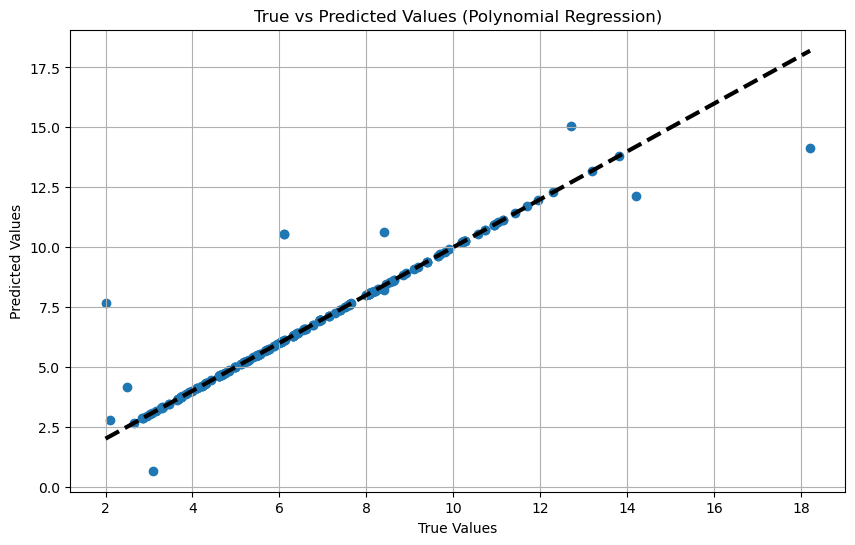

In [57]:
# Plotting the predicted vs true values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=3)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values (Polynomial Regression)')
plt.grid(True)
plt.show()

Better fit with few outliers.

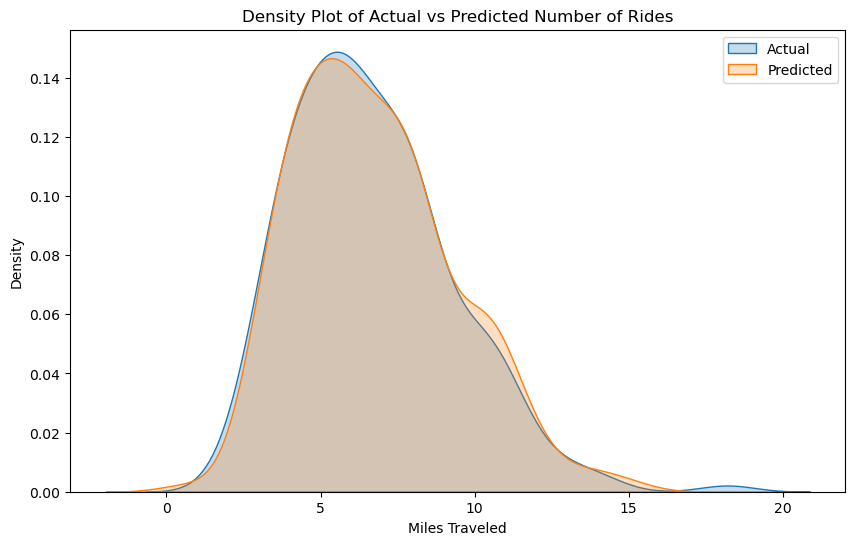

In [58]:
# Plotting density plot of actual and predicted miles traveled
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label='Actual', shade=True)
sns.kdeplot(y_pred, label='Predicted', shade=True)
plt.title('Density Plot of Actual vs Predicted Number of Rides')
plt.xlabel('Miles Traveled')
plt.ylabel('Density')
plt.legend()
plt.show()

<h5>Model 4: Polynomial Regression to predict the Frequency of rides(COUNT) travelled </h5>

In [59]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming X_count contains features and y_count contains the target variable

# Define the degree of the polynomial
degree = 3  # You can adjust the degree based on the complexity of the relationships in your data

# Transform the features to polynomial features
poly = PolynomialFeatures(degree)
X_poly_count = poly.fit_transform(X_count)

# Split data into training and testing sets
X_train_poly_count, X_test_poly_count, y_train_count, y_test_count = train_test_split(X_poly_count, y_count, test_size=0.2, random_state=42)

# Initialize and train Polynomial Regression model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly_count, y_train_count)

# Make predictions
y_pred_count = poly_reg.predict(X_test_poly_count)

# Evaluate model performance
r2_poly_count = r2_score(y_test_count, y_pred_count)
print("R-squared Score (Polynomial Regression):", r2_poly_count)


R-squared Score (Polynomial Regression): 0.9801185717235987


##### Model 4: Model evaluation

Train-test split Metrics:
Mean Squared Error: 0.2628390797255308
Root Mean Squared Error: 0.5126783394347091
Mean Absolute Error: 0.11480184085796198
R-squared Score: 0.9801185717235987

Cross-Validation Metrics:
Mean Squared Error: 0.815441502008032
Root Mean Squared Error: 0.903017996502856
Mean Absolute Error: 0.37890010952902514
R-squared Score: 0.935563131852865


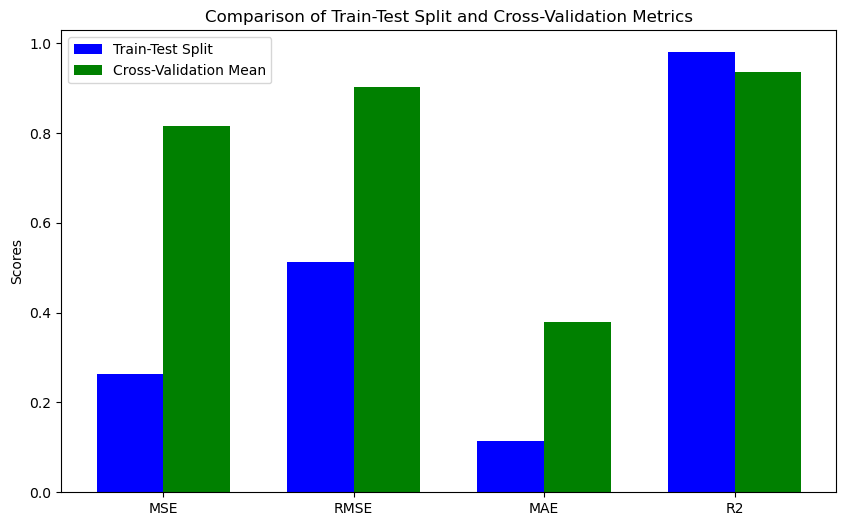

In [60]:
# Evaluating the model using train-test split
mse = mean_squared_error(y_test_count, y_pred_count)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_count, y_pred_count)
r2 = r2_score(y_test_count, y_pred_count)

print("Train-test split Metrics:")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)


# Evaluate model performance by cross-validation
cv_mse_scores = -cross_val_score(regressor, X_train_count, y_train_count, cv=5, scoring='neg_mean_squared_error')
cv_mae_scores = -cross_val_score(regressor, X_train_count, y_train_count, cv=5, scoring='neg_mean_absolute_error')
cv_r2_scores = cross_val_score(regressor, X_train_count, y_train_count, cv=5, scoring='r2')

# Calculating means of cross-validation scores
cv_mse_mean = cv_mse_scores.mean()
cv_rmse_mean = np.sqrt(cv_mse_mean)
cv_mae_mean = cv_mae_scores.mean()
cv_r2_mean = cv_r2_scores.mean()

print("\nCross-Validation Metrics:")
print("Mean Squared Error:", cv_mse_mean)
print("Root Mean Squared Error:", cv_rmse_mean)
print("Mean Absolute Error:", cv_mae_mean)
print("R-squared Score:", cv_r2_mean)


#Compare metrics of train-test split and cross-validation

# Data preparation for visualisation
metrics = ['MSE', 'RMSE', 'MAE', 'R2']
train_test_values = [mse, rmse, mae, r2]
cv_means = [cv_mse_mean, cv_rmse_mean, cv_mae_mean, cv_r2_mean]

# Setting up data for grouped bars
x = range(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x, train_test_values, width, label='Train-Test Split', color='blue')
rects2 = ax.bar([p + width for p in x], cv_means, width, label='Cross-Validation Mean', color='green')

ax.set_ylabel('Scores')
ax.set_title('Comparison of Train-Test Split and Cross-Validation Metrics')
ax.set_xticks([p + width / 2 for p in x])
ax.set_xticklabels(metrics)
ax.legend()

plt.show()


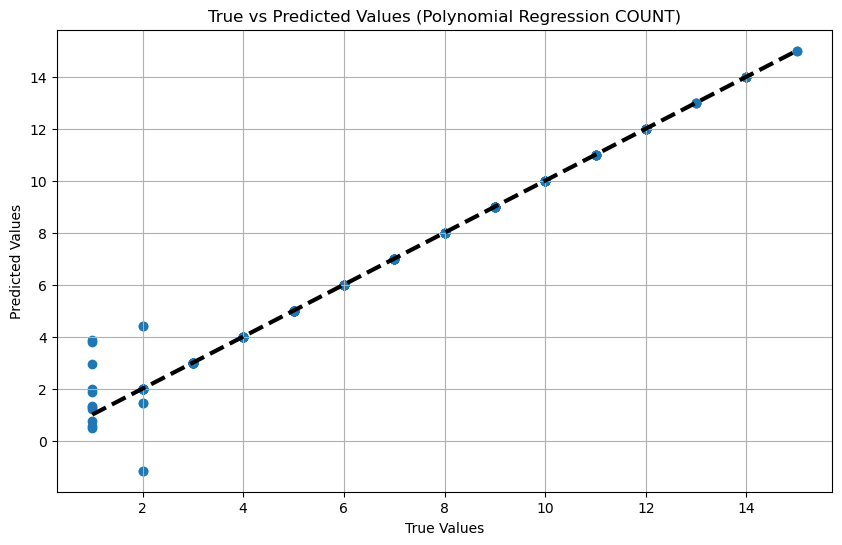

In [61]:
# Plotting the predicted vs true values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_count, y_pred_count)
plt.plot([min(y_test_count), max(y_test_count)], [min(y_test_count), max(y_test_count)], 'k--', lw=3)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values (Polynomial Regression COUNT)')
plt.grid(True)
plt.show()

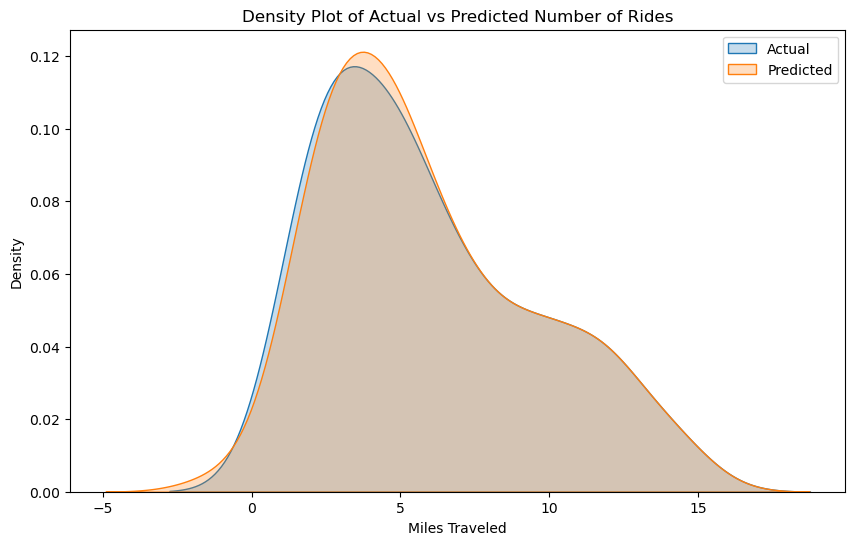

In [62]:
# Plotting density plot of actual and predicted miles traveled
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test_count, label='Actual', shade=True)
sns.kdeplot(y_pred_count, label='Predicted', shade=True)
plt.title('Density Plot of Actual vs Predicted Number of Rides')
plt.xlabel('Miles Traveled')
plt.ylabel('Density')
plt.legend()
plt.show()